<h1 style="text-align:center;color:yellow;font-size:50px;font-family:ALGERIAN;border:solid">Projet de Machine Learning</h1>

<h1 style="text-align:center;color:yellow;font-size:50px;font-family:times">Ecole Nationale de la Statistique et de l'Analyse Economique Pierre NDIAYE (ENSAE)</h1><br>

<div style="display:flex;text-align:justify">
    
    
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle; width:60%"> 
<span style="font-weight:bold">Réalisé par : </span> 
    <ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle"> 
        <li>KPAKOU M'Mounéné</li>                                      
        <li>SANGARE Gnalen</li>
        <li>Moussa Mahammadou Oumar Farouk</li>                                      
        <li>ADAM Alassane</li>
    </ul>
    <span style="font-style: italic;font-size:13px">Élèves Ingénieurs Statisticiens Economistes</span>
</ul>
 
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:none;width:39%"> 
 <li style="font-weight:bold">Sous la supervision de :</li> 
 <li>Mme. Mously DIAW</li>                                     
   
</ul>
    
</div>   

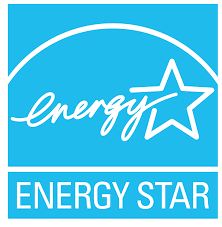

<div style="background-color: blue;" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - IMPORTATIONS DES DONNEES</h1>
</div>

## LIBRAIRIES

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport
from yellowbrick.regressor import ResidualsPlot
from scipy.stats import chi2_contingency


In [2]:
# Le répertoire du projet contenant le dossier data
HOME_DIR = Path.cwd().parent
print(f"Home directory: {HOME_DIR}")

# Le répertoire des données
DATA_DIR = Path(HOME_DIR, "Data")
print(f"Data directory: {DATA_DIR}")

# Chargement des données
data = pd.read_csv(Path(DATA_DIR, "2016_Building_Energy_Benchmarking_20241107.csv"), sep =",")

Home directory: c:\Users\LENOVO\Desktop\KPAM ISE 2\Machine learning 1\Projet_ML
Data directory: c:\Users\LENOVO\Desktop\KPAM ISE 2\Machine learning 1\Projet_ML\Data


### <font color="#2cb7b0" id=""> Description et nettoyage des données</font>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

## Description des variables

| Variable                          | Non-Null Count | Data type     | Description |
|----------------------------------|----------------|-----------|-------------------|
| OSEBuildingID                    | 3376 non-null  | int64     | Identifiant de la propireté |
| DataYear                         | 3376 non-null  | int64     | Année d'enrégistrement |
| BuildingType                     | 3376 non-null  | object    | Type de bâtiment |
| PrimaryPropertyType              | 3376 non-null  | object    | Utilisation principale d’un bien |
| PropertyName                     | 3376 non-null  | object    | Nom de la proprieté |
| Address                          | 3376 non-null  | object    | Adresse postale de la propriété |
| City                             | 3376 non-null  | object    | Ville de la propriété |
| State                            | 3376 non-null  | object    | État de la propriété |
| ZipCode                          | 3360 non-null  | float64   | Code postal |
| TaxParcelIdentificationNumber    | 3376 non-null  | object    | Numéro d'identification fiscal |
| CouncilDistrictCode              | 3376 non-null  | int64     | Code du district du conseil municipal |
| Neighborhood                     | 3376 non-null  | object    | quartier |
| Latitude                         | 3376 non-null  | float64   | Latitude |
| Longitude                        | 3376 non-null  | float64   | Longitude |
| YearBuilt                        | 3376 non-null  | int64     | Année de construction de la propriété |
| NumberofBuildings                | 3368 non-null  | float64   | Nombre de bâtiments inclus dans le rapport de la propriété |
| NumberofFloors                   | 3376 non-null  | int64     | Nombre d’étages déclarés dans Portfolio Manager |
| PropertyGFATotal                 | 3376 non-null  | int64     | Surface de plancher brute totale du bâtiment et du parking |
| PropertyGFAParking               | 3376 non-null  | int64     | Espace total en pieds carrés de tous les types de stationnement |
| PropertyGFABuilding(s)           | 3376 non-null  | int64     | Surface totale en pieds carrés entre les surfaces extérieures des murs d’enceinte d’un bâtiment |
| ListOfAllPropertyUseTypes        | 3367 non-null  | object    | Toutes les utilisations des biens immobiliers déclarées dans Portfolio Manager |
| LargestPropertyUseType           | 3356 non-null  | object    | La plus grande utilisation d’un bien |
| LargestPropertyUseTypeGFA        | 3356 non-null  | float64   | La surface de plancher brute (GFA) de la plus grande utilisation de la propriété |
| SecondLargestPropertyUseType     | 1679 non-null  | object    | La deuxième plus grande utilisation d’une propriété |
| SecondLargestPropertyUseTypeGFA  | 1679 non-null  | float64   | La surface de plancher brute (SPB) de la deuxième utilisation en importance de la propriété |
| ThirdLargestPropertyUseType      | 596 non-null   | object    | La troisième plus grande utilisation d’un bien |
| ThirdLargestPropertyUseTypeGFA   | 596 non-null   | float64   | La surface de plancher brute (SPB) de la troisième plus grande utilisation de la propriété |
| YearsENERGYSTARCertified         | 119 non-null   | object    | Depuis que la propriété a reçu la certification ENERGY STAR |
| ENERGYSTARScore                  | 2533 non-null  | float64   | Une cote de 1 à 100 calculée par l’EPA qui évalue la performance énergétique globale d’une propriété |
| SiteEUI(kBtu/sf)                 | 3369 non-null  | float64   | L’intensité de consommation d’énergie du site (IUE) par surface|
| SiteEUIWN(kBtu/sf)               | 3370 non-null  | float64   | L’intensité de consommation d’énergie du site normalisée en fonction des conditions météorologiques (WN) |
| SourceEUI(kBtu/sf)               | 3367 non-null  | float64   | L’intensité de consommation d’énergie à la source (IUE) |
| SourceEUIWN(kBtu/sf)             | 3367 non-null  | float64   | L’intensité de consommation d’énergie de la source normalisée en fonction des conditions météorologiques (IUE) |
| SiteEnergyUse(kBtu)              | 3371 non-null  | float64   | La quantité annuelle d’énergie consommée par la propriété à partir de toutes les sources d’énergie |
| SiteEnergyUseWN(kBtu)            | 3370 non-null  | float64   | La quantité annuelle d’énergie consommée par la propriété à partir de toutes les sources d’énergie ajustée à ce que la propriété aurait consommé pendant les conditions météorologiques moyennes sur 30 ans |
| SteamUse(kBtu)                   | 3367 non-null  | float64   | La quantité annuelle de vapeur urbaine consommée par la propriété sur le site |
| Electricity(kWh)                 | 3367 non-null  | float64   | La quantité annuelle d’électricité consommée par la propriété sur place |
| Electricity(kBtu)                | 3367 non-null  | float64   | La quantité annuelle d’électricité consommée par la propriété sur place |
| NaturalGas(therms)               | 3367 non-null  | float64   | La quantité annuelle de gaz naturel fournie par les services publics consommée par la propriété |
| NaturalGas(kBtu)                 | 3367 non-null  | float64   | La quantité annuelle de gaz naturel fournie par les services publics consommée par la propriété |
| DefaultData                      | 3376 non-null  | bool      | La propriété utilisait des données par défaut pour au moins une caractéristique de propriété |
| Comments                         | 0 non-null      | float64   | Commentaires |
| ComplianceStatus                 | 3376 non-null  | object    | Si une propriété a satisfait aux exigences en matière d’analyse comparative énergétique pour l’année de déclaration en cours |
| Outlier                          | 32 non-null     | object    | Si une propriété est une valeur aberrante élevée ou faible (O/N) |
| TotalGHGEmissions                | 3367 non-null  | float64   | La quantité totale d’émissions de gaz à effet de serre |
| GHGEmissionsIntensity            | 3367 non-null  | float64   | Émissions totales de gaz à effet de serre divisées par la surface de plancher brute de la propriété |


Il est précisié dans le projet que **seuls les bâtiments non destinés à l'habitation seront étudiés**. Nous allons donc supprimer toutes les lignes correspondant à des habitations en nous basant sur la variable `BuildingType`

In [4]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [5]:
data = data[~data['BuildingType'].str.contains("Multifamily")]
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [6]:
print("Le jeu de données compte à présent {} lignes et {} colonnes.".format(data.shape[0],data.shape[1]))

Le jeu de données compte à présent 1668 lignes et 46 colonnes.


### Traitement de la modalité Campus

Suppression des campus principalement destinés aux logement multifamiliaux

In [7]:
df_campus = data[data['BuildingType']== 'Campus']
df_campus['PrimaryPropertyType'].unique() # Nom des propriétés 

array(['Mixed Use Property', 'University', 'Large Office', 'Other',
       'K-12 School', 'Low-Rise Multifamily', 'Restaurant'], dtype=object)

In [8]:
df_campus

OSEBuildingID  DataYear BuildingType   PrimaryPropertyType  \
35               43      2016       Campus    Mixed Use Property   
105             172      2016       Campus            University   
128             211      2016       Campus            University   
162             261      2016       Campus          Large Office   
195             315      2016       Campus                 Other   
289             419      2016       Campus    Mixed Use Property   
301             432      2016       Campus    Mixed Use Property   
340             477      2016       Campus                 Other   
661           19491      2016       Campus                 Other   
954           20325      2016       Campus           K-12 School   
1297          21478      2016       Campus    Mixed Use Property   
1300          21481      2016       Campus  Low-Rise Multifamily   
1301          21482      2016       Campus            Restaurant   
1494          22062      2016       Campus            University   
1692          23117      2016       Campus                 Other   
1732          23265      2016       Campus                 Other   
1862          23622      2016       Campus                 Other   
1993          24086      2016       Campus                 Other   
2270          25069      2016       Campus           K-12 School   
2325          25251      2016       Campus            University   
2993          27799      2016       Campus           K-12 School   
3022          27901      2016       Campus           K-12 School   
3252          49909      2016       Campus            University   
3274          49967      2016       Campus            University   

                                           PropertyName  \
35                                         Plant 2 Site   
105                                    SSCC MAIN CAMPUS   
128                                    NSCC MAIN CAMPUS   
162                                          South Park   
195   P66 Bell Harbor International Conference Cente...   
289                                         Main Market   
301                          Securities Building Campus   
340                         Weintraub/Hutchinson/Thomas   
661                      Pacific Multiforms Inc- Campus   
954                             University Prep Academy   
1297                                     Economy Market   
1300                                    Sanitary Market   
1301                                      Corner Market   
1494                                      Entire Campus   
1692                   Joint Training Facilities Campus   
1732                                      T102 1011 B/C   
1862                          FT C15 Fishermen's Center   
1993  (ID#24086)Campus1:KC Metro Transit Atlantic Ce...   
2270                                  O'Dea High School   
2325                            5th Avenue Master Meter   
2993            The Bush School - Lower / Middle School   
3022                     The Bush School - Upper School   
3252                    SSCC DUWAMISH GEORGETOWN CAMPUS   
3274          University of Washington - Seattle Campus   

                         Address     City State  ZipCode  \
35         7755 E MARGINAL WAY S  Seattle    WA  98108.0   
105             6000 16th Ave SW  Seattle    WA  98106.0   
128           9600 COLLEGE WAY N  Seattle    WA  98103.0   
162               1420 S Trenton  Seattle    WA  98108.0   
195             2225 Alaskan Way  Seattle    WA  98125.0   
289              1501 Pike Place  Seattle    WA  98101.0   
301            1904 Third Avenue  Seattle    WA  98101.0   
340          1100 Fairview Ave N  Seattle    WA  98109.0   
661        6606 Urusla Pl. South  Seattle    WA  98155.0   
954             8000 25th Ave NE  Seattle    WA  98115.0   
1297           1433 First Avenue  Seattle    WA  98101.0   
1300           1525 FIrst Avenue  Seattle    WA  98101.0   
1301             1501 1st Avenue  Seattle    WA  

In [9]:
# Suppression les lignes où la colonne 'PrimaryPropertyType' contient 'Low-Rise Multifamily'
data = data[data['PrimaryPropertyType'] != 'Low-Rise Multifamily']
data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Office'], dtype=object)

In [10]:
print(data["City"].unique())
print(data["State"].unique())
print(data["DataYear"].unique())

['Seattle']
['WA']
[2016]


Repartition des types de batiments

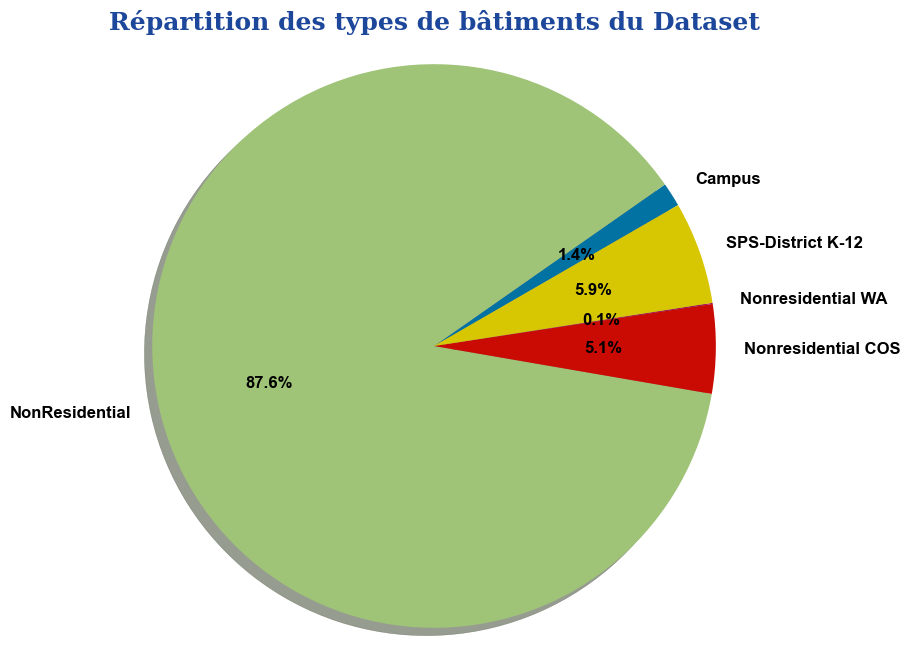

In [11]:
building_type = data.groupby(by='BuildingType')['OSEBuildingID'].nunique()

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments du Dataset", fontdict=font_title)
plt.show()

La majeur partie des bâtiments sont typés "NonResidential". Nous pouvons visualiser les diverses catégories représentées dans ce type de bâtiments :

In [12]:
data.loc[(data['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Small- and Mid-Sized Office    288
Other                          185
Warehouse                      180
Large Office                   168
Mixed Use Property             102
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             51
Supermarket / Grocery Store     40
K-12 School                     39
Medical Office                  38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Name: count, dtype: int64

#### Vocabulaire

Significations de quelques acronymes

GHG: greenhouse gas emissions, correspond aux émissions des gazs à effet de serre.

OSE: Seattle Office of Sustainability and Environment.

EUI: Energy Use Intensity.

kBtu: kilo-British thermal unit, 1 kWh = 3.412 kBtu.

sf: square feet, 1m² = 10,7639sf.

WN: weather-normalized, normalisé vis à vis des conditions climatiques.

GFA: Gross floor area, Surface de plancher brute - La surface de plancher couverte (par un toit, même sans mur) 
    totale contenue dans le bâtiment.

therm: mesure énergétique 1thm =100000Btu.



Dans la visualisation, certaines variables apparaissent donc comme redondantes :
- `Electricity(kWh)` et `Electricity(kBtu)`,
- `NaturalGas(therms)` et `NaturalGas(kBtu)`

Nous allons donc commencer par supprimer ces variables :

In [13]:
#Suppression des variables redondantes
redundant_features = ['NaturalGas(therms)','Electricity(kWh)']
data.drop(redundant_features, axis=1, inplace=True)

Nous constatons qu'il n'y a pas de données dans les variables Outlier et Comments. La variable Comments renseigne sur les commentaires des propriétaires ou de tout autre agent concernant la consommation d'énergie, tandis que la variable Outlier indique si la propriété présente une valeur élevée ou faible. Nous devrons faire sans la variable Comments.

Les variables City et State n'ont pas un grand intérêt, car elles n'admettent chacune qu'une seule modalité. Il en est de même pour les variables ZipCode qui désigne ici le code postal.

De plus, nous avons constaté que, dans la base contenant des bâtiments non résidentiels, la variable cible `SiteEnergyUse (kBtu)` contient deux valeurs manquantes. Or, en modélisation, la variable cible ne peut pas être nulle.

Nous allons donc procéder aux modifications susmentionnées. Toutefois, bien que notre modèle de référence soit basé sur les jeux de données avant toute transformation, il existe des pistes à explorer en répondant aux questions suivantes :

Quelles sont les lignes pour lesquelles la variable Outlier n'est pas vide ?


In [14]:
# Suppression des colonnnes
data = data.drop(["Comments", "State", "City", "ZipCode", "CouncilDistrictCode","YearsENERGYSTARCertified","Outlier"], axis=1)
# 8 variables dropped

## Traitement des valeurs manquantes

### Affichage des variables ayant des valeurs manquantes

<Axes: >

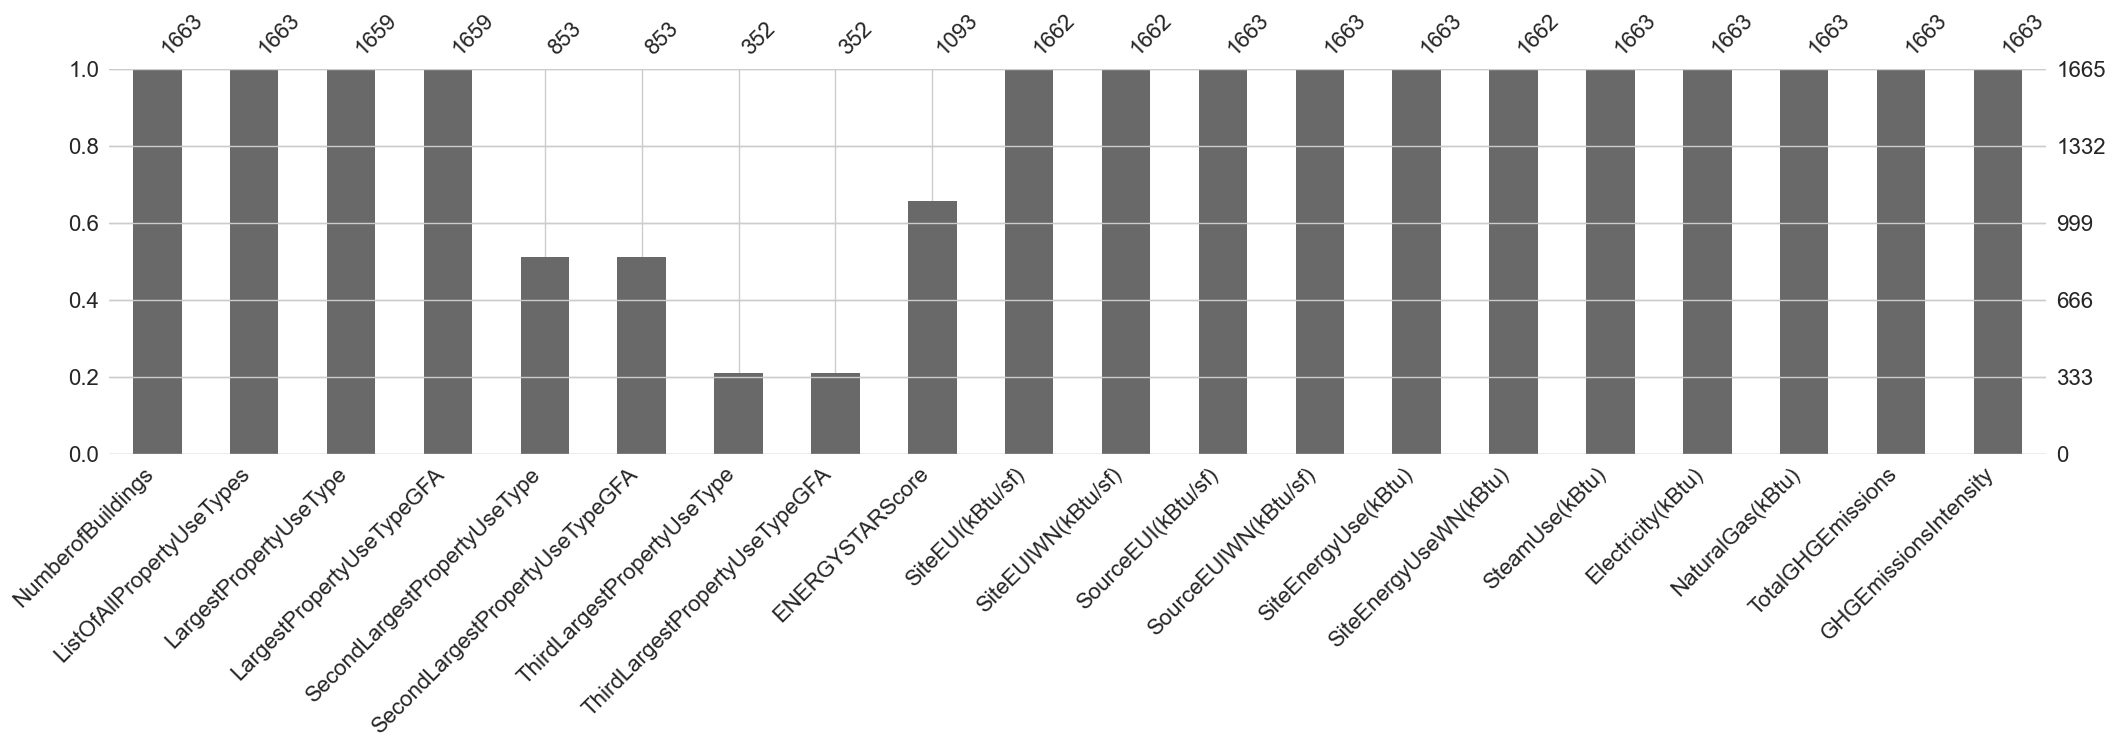

In [15]:
# # A bar chart visualization of the nullity of the given DataFrame.
msno.bar(data[data.columns[data.isna().any()]], figsize = (25, 5))

## Traitement de la variable  **consommation d'énergie du bâtiment** (`SiteEnergyUse(kBtu)`)

In [16]:
# Afficher les observations pour lesquelles la variable à prédire (SiteEnergyUse(kBtu)) n'est pas renseignée
energy_na = data["SiteEnergyUse(kBtu)"].isnull()
data.loc[energy_na, :]

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
578             773      2016  NonResidential  Small- and Mid-Sized Office   
2670          26532      2016  NonResidential           Mixed Use Property   

          PropertyName                 Address TaxParcelIdentificationNumber  \
578   SEATTLE BUILDING         215 COLUMBIA ST                    0939000245   
2670  KALBERG BUILDING  4515 UNIVERSITY WAY NE                    8816401120   

     Neighborhood  Latitude  Longitude  ...  SourceEUIWN(kBtu/sf)  \
578      DOWNTOWN  47.60380 -122.33293  ...                   NaN   
2670    NORTHEAST  47.66182 -122.31345  ...                   NaN   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
578                   NaN                    NaN             NaN   
2670                  NaN                    NaN             NaN   

      Electricity(kBtu)  NaturalGas(kBtu) DefaultData ComplianceStatus  \
578                 NaN               NaN       False    Non-Compliant   
2670                NaN               NaN       False    Non-Compliant   

      TotalGHGEmissions GHGEmissionsIntensity  
578                 NaN                   NaN  
2670                NaN                   NaN  

[2 rows x 37 columns]

Certaines lignes comportent des manquants sur cette variable ainsi que les variables succeptibles de determiner le niveau de consommation de l'energie des bâtiments, nous allons donc les supprimer :

In [17]:
data = data[~((data['SiteEnergyUse(kBtu)'].isnull()))]

In [18]:
data.describe()

OSEBuildingID  DataYear    Latitude    Longitude   YearBuilt  \
count    1663.000000    1663.0  1663.00000  1663.000000  1663.00000   
mean    16328.996392    2016.0    47.61602  -122.332922  1961.97715   
std     13845.888812       0.0     0.04822     0.024609    32.72543   
min         1.000000    2016.0    47.49917  -122.411820  1900.00000   
25%       581.500000    2016.0    47.58535  -122.343300  1930.00000   
50%     21142.000000    2016.0    47.61234  -122.332940  1965.00000   
75%     24601.500000    2016.0    47.64970  -122.321725  1989.00000   
max     50226.000000    2016.0    47.73387  -122.258640  2015.00000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        1663.000000     1663.000000      1.663000e+03   
mean            1.168972        4.123873      1.190469e+05   
std             2.934044        6.572949      2.977825e+05   
min             0.000000        0.000000      1.128500e+04   
25%             1.000000        1.000000      2.945750e+04   
50%             1.000000        2.000000      4.929900e+04   
75%             1.000000        4.000000      1.060205e+05   
max           111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  ...  SiteEUIWN(kBtu/sf)  \
count         1663.000000            1.663000e+03  ...         1662.000000   
mean         12915.054720            1.061319e+05  ...           74.635319   
std          42329.497628            2.846169e+05  ...           75.065299   
min              0.000000            3.636000e+03  ...            0.000000   
25%              0.000000            2.845850e+04  ...           35.400002   
50%              0.000000            4.741500e+04  ...           53.900002   
75%              0.000000            9.492400e+04  ...           85.199997   
max         512608.000000            9.320156e+06  ...          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         1663.000000           1663.000000         1.663000e+03   
mean           175.945701            178.208900         8.449617e+06   
std            186.018109            186.004638         3.026977e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             76.599998             79.400002         1.230468e+06   
50%            131.000000            134.199997         2.556131e+06   
75%            203.900002            205.599998         6.917379e+06   
max           2620.000000           2620.000000         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
count           1.662000e+03    1.663000e+03       1.663000e+03   
mean            8.075731e+06    5.134972e+05       5.850707e+06   
std             2.205707e+07    5.518875e+06       2.081469e+07   
min             0.000000e+00    0.000000e+00      -1.154170e+05   
25%             1.295210e+06    0.000000e+00       7.217060e+05   
50%             2.686911e+06    0.000000e+00       1.611215e+06   
75%             7.149921e+06    0.000000e+00       4.863081e+06   
max             4.716139e+08    1.349435e+08       6.570744e+08   

       NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  
count      1.663000e+03        1663.000000            1663.000000  
mean       1.974190e+06         185.272616               1.610132  
std        9.378935e+06         752.621187               2.338357  
min        0.000000e+00          -0.800000              -0.020000  
25%        0.000000e+00          20.005000               0.350000  
50%        5.037650e+05          49.620000               0.880000  
75%        1.522622e+06         142.865000               1.895000  
max        2.979090e+08       16870.980000              34.090000  

[8 rows x 25 columns]

Nouvelle visualisation des variables ayant les valeurs manquantes

<Axes: >

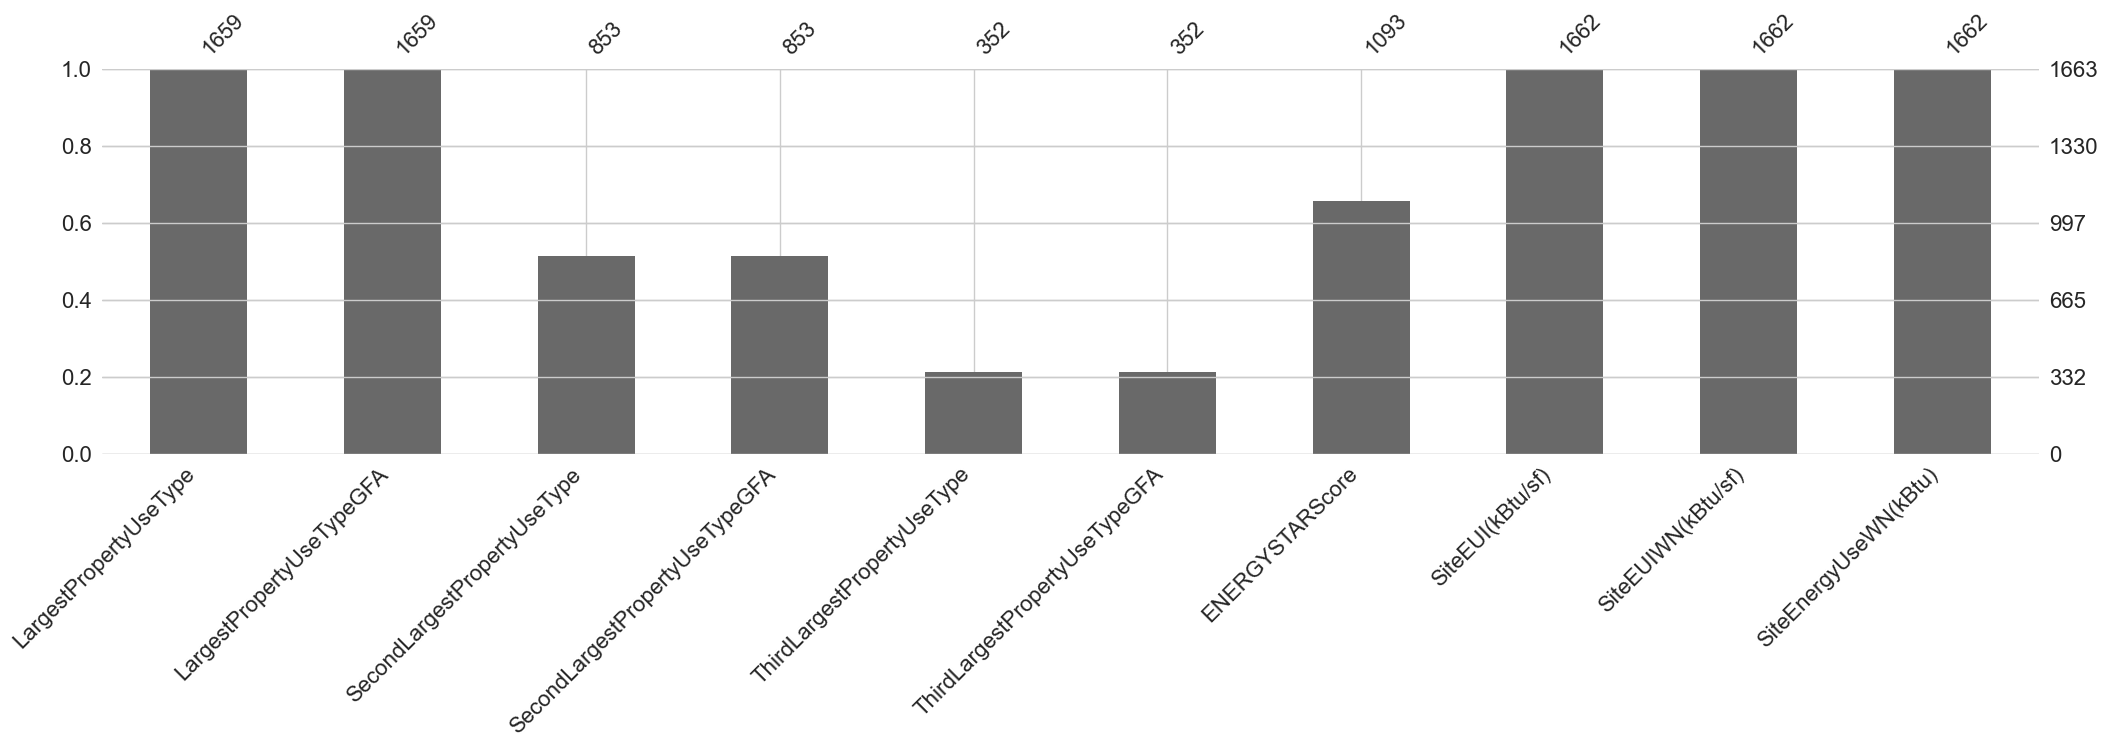

In [19]:
# # A bar chart visualization of the nullity of the given DataFrame.
msno.bar(data[data.columns[data.isna().any()]], figsize = (25, 5))

In [20]:
# Afficher les observations pour lesquelles la variable SiteEUI(kBtu/sf) n'est pas renseignée 
SiteEUI_kBtu_sf_na = data['SiteEUI(kBtu/sf)'].isnull()
data.loc[SiteEUI_kBtu_sf_na, ['PropertyName', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal']]

PropertyName  SiteEUI(kBtu/sf)  \
304  Washington State Convention Center               NaN   

     SiteEnergyUse(kBtu)  PropertyGFATotal  
304                  0.0           1400000

L'intensité de consommation d’énergie du site (IUE) peut êtimé par le rapport de la consommation d’énergie du site d’une propriété et sa surface de plancher brute.

In [21]:
data['SiteEUI(kBtu/sf)'].fillna(data['SiteEnergyUse(kBtu)']/data['PropertyGFATotal'], inplace=True)
data.loc[SiteEUI_kBtu_sf_na, ['PropertyName', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal']]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17144\2301858991.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SiteEUI(kBtu/sf)'].fillna(data['SiteEnergyUse(kBtu)']/data['PropertyGFATotal'], inplace=True)


PropertyName  SiteEUI(kBtu/sf)  \
304  Washington State Convention Center               0.0   

     SiteEnergyUse(kBtu)  PropertyGFATotal  
304                  0.0           1400000

In [22]:
# Afficher les observations pour lesquelles la variable SiteEUIWN(kBtu/sf) /SiteEnergyUseWN(kBtu) n'est pas renseignée 
SiteEUIWN_kBtu_sf_na = (data['SiteEUIWN(kBtu/sf)'].isnull() | data['SiteEnergyUseWN(kBtu)'].isnull())
data.loc[SiteEUIWN_kBtu_sf_na, ['PropertyName', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'PropertyGFATotal']]

PropertyName  SiteEUIWN(kBtu/sf)  \
563  Market Place I & II-2003 Western Avenue                 NaN   

     SiteEnergyUseWN(kBtu)  PropertyGFATotal  
563                    NaN            131143

In [23]:
data['SiteEUIWN(kBtu/sf)'].fillna(data['SiteEUI(kBtu/sf)'], inplace = True)
data['SiteEnergyUseWN(kBtu)'].fillna(data['SiteEnergyUse(kBtu)'], inplace = True)
# Afficher les résultats
data.loc[SiteEUIWN_kBtu_sf_na, ['PropertyName', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'PropertyGFATotal']]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17144\3732774557.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SiteEUIWN(kBtu/sf)'].fillna(data['SiteEUI(kBtu/sf)'], inplace = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17144\3732774557.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

PropertyName  SiteEUIWN(kBtu/sf)  \
563  Market Place I & II-2003 Western Avenue                39.5   

     SiteEnergyUseWN(kBtu)  PropertyGFATotal  
563              5177270.5            131143

<Axes: >

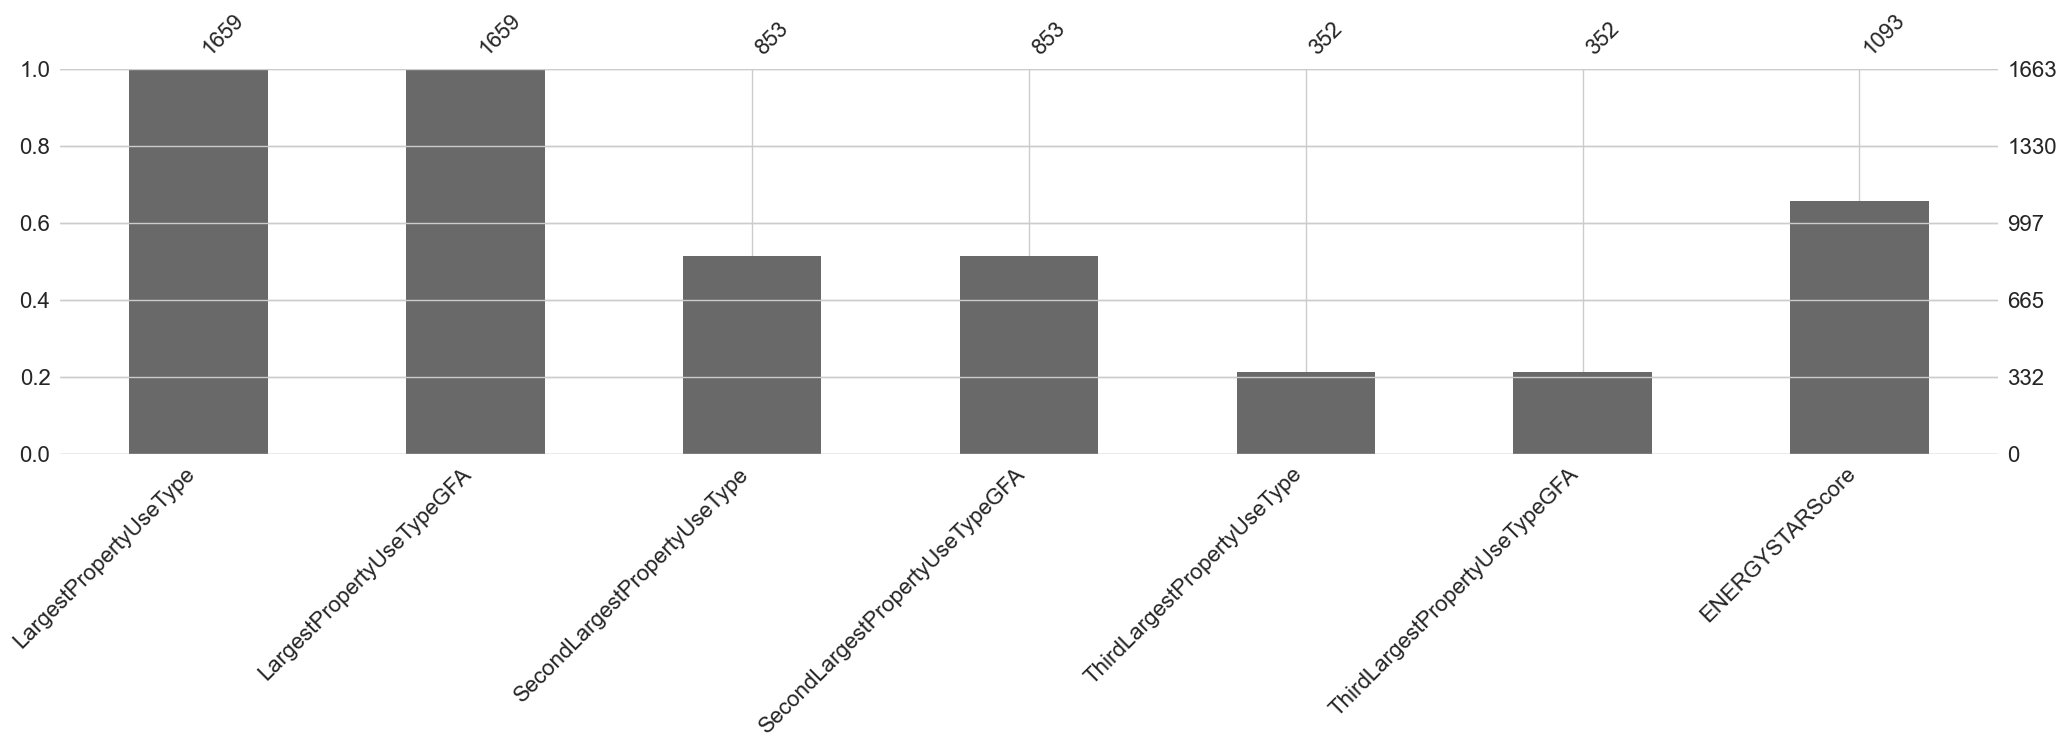

In [24]:
# A new bar chart visualization of the nullity of the given DataFrame.
msno.bar(data[data.columns[data.isna().any()]], figsize = (25, 5))

Nous allons traiter le reste des vairable dans la partie suivante

## Traitement des variables Utilisation du bien immobilier

In [25]:
# Afficher les observations pour lesquelles la variable LargestPropertyUseType n'est pas renseignée
df=data
LargeUse_na = df.LargestPropertyUseType.isnull()
df.loc[LargeUse_na ,['OSEBuildingID', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType']] 

OSEBuildingID                          ListOfAllPropertyUseTypes  \
353             496  Fitness Center/Health Club/Gym, Office, Other ...   
1147          21103                                              Hotel   
2414          25568                                             Office   
2459          25711                                         Restaurant   

     LargestPropertyUseType  
353                     NaN  
1147                    NaN  
2414                    NaN  
2459                    NaN

Nous allons supposer que, pour les bâtiments pour lesquels la variable « LargestPropertyUseType » n’est pas spécifiée, la principale utilisation du bien correspond au premier élément de la liste de toutes les utilisations déclarées de ce bien immobilier. Il est d’ailleurs à noter que, pour la plupart de ces bâtiments, une seule utilisation du bien est enregistrée.

In [26]:
# Traitement des Na de la variable "LargestPropertyUseType" comme mentionné ci-dessus
df.loc[LargeUse_na, "LargestPropertyUseType"] = [Use.split(",")[0].strip() for Use in df.loc[LargeUse_na, "ListOfAllPropertyUseTypes"]]
#
df.loc[LargeUse_na,['OSEBuildingID', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType']]

OSEBuildingID                          ListOfAllPropertyUseTypes  \
353             496  Fitness Center/Health Club/Gym, Office, Other ...   
1147          21103                                              Hotel   
2414          25568                                             Office   
2459          25711                                         Restaurant   

              LargestPropertyUseType  
353   Fitness Center/Health Club/Gym  
1147                           Hotel  
2414                          Office  
2459                      Restaurant

In [27]:
# Afficher les observations pour lesquelles la variable LargestPropertyUseTypeGFA n'est pas renseignée
LargestPropertyUseTypeGFA_na = df.LargestPropertyUseTypeGFA.isnull()
df.loc[LargestPropertyUseTypeGFA_na ,['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'PropertyGFATotal']]

ListOfAllPropertyUseTypes  \
353   Fitness Center/Health Club/Gym, Office, Other ...   
1147                                              Hotel   
2414                                             Office   
2459                                         Restaurant   

              LargestPropertyUseType  LargestPropertyUseTypeGFA  \
353   Fitness Center/Health Club/Gym                        NaN   
1147                           Hotel                        NaN   
2414                          Office                        NaN   
2459                      Restaurant                        NaN   

      PropertyGFATotal  
353             111445  
1147             61721  
2414             48350  
2459             28800

Pour la plupart de ces observation, une seule utilisation du bien immobilier est entrégistrée.   
Par conséquent, les valeurs manquantes de la variable « surface de plancher brute (SPB) de la plus grande utilisation de la propriété » peuvent être attribuées à la surface de plancher brute totale associée à cette propriété.

In [28]:
## Traitement des na comme mentionné ci-dessus
df['LargestPropertyUseTypeGFA'].fillna(df['PropertyGFATotal'], inplace=True)
## Voir le résultat du traitement
df.loc[LargestPropertyUseTypeGFA_na ,['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'PropertyGFATotal']]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17144\2150932561.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LargestPropertyUseTypeGFA'].fillna(df['PropertyGFATotal'], inplace=True)


ListOfAllPropertyUseTypes  \
353   Fitness Center/Health Club/Gym, Office, Other ...   
1147                                              Hotel   
2414                                             Office   
2459                                         Restaurant   

              LargestPropertyUseType  LargestPropertyUseTypeGFA  \
353   Fitness Center/Health Club/Gym                   111445.0   
1147                           Hotel                    61721.0   
2414                          Office                    48350.0   
2459                      Restaurant                    28800.0   

      PropertyGFATotal  
353             111445  
1147             61721  
2414             48350  
2459             28800

Pour une analyse approfondie des variables "Deuxième plus grande utilisation d’une propriété", "Surface de plancher brute (SPB) de la deuxième utilisation en importance de la propriété.", "Troisième plus grande utilisation d’une propriété" et "Surface de plancher brute (SPB) de la troisième plus grande utilisation de la propriété.", nous allons créer une nouvelle variable fournissant le nombre d'utilisations de la propriété et qui sera nommée NumberPropertyUseType

In [29]:
# Vréation de la variable NumberPropertyUseType
df['NumberPropertyUseType'] = [len(AllPropertyUseTypes.split(",")) for AllPropertyUseTypes in df.ListOfAllPropertyUseTypes]

In [30]:
# Afficher les observations pour lesquelles la variable SecondLargestPropertyUseType n'est pas renseignée 
SecondLargestPropertyUseType_na = df.SecondLargestPropertyUseType.isnull()
df.loc[SecondLargestPropertyUseType_na, ['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType']]

ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                        Hotel                  Hotel   
2                        Hotel                  Hotel   
3                        Hotel                  Hotel   
5               Police Station         Police Station   
6                        Hotel                  Hotel   
...                        ...                    ...   
3367        Other - Recreation     Other - Recreation   
3369                    Office                 Office   
3370        Other - Recreation     Other - Recreation   
3371                    Office                 Office   
3372        Other - Recreation     Other - Recreation   

     SecondLargestPropertyUseType  
0                             NaN  
2                             NaN  
3                             NaN  
5                             NaN  
6                             NaN  
...                           ...  
3367                          NaN  
3369                          NaN  
3370                          NaN  
3371                          NaN  
3372                          NaN  

[810 rows x 3 columns]

In [31]:
# Afficher les observations pour lesquelles la variable SecondLargestPropertyUseType n'est pas renseignée 
# et que plus d'une utilisation a été enrégistrée pour cette proprieté
df.loc[SecondLargestPropertyUseType_na & df.NumberPropertyUseType > 1, ['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'NumberPropertyUseType']]

Empty DataFrame
Columns: [ListOfAllPropertyUseTypes, LargestPropertyUseType, SecondLargestPropertyUseType, NumberPropertyUseType]
Index: []

Nous notons que la variable "Deuxième plus grande utilisation d’une propriété" est correctement enregistrée pour les propriétés qui enregistrent plus d'une utilisation. Par conséquent, es valeurs manquantes de la variable "SecondLargestPropertyUseType" est parfaitement justifiée.  

Une telle analyse peut également être effectuée sur les variables : SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType et ThirdLargestPropertyUseTypeGFA.

In [32]:
# Variable SecondLargestPropertyUseTypeGFA
SecondLargestPropertyUseTypeGFA_na = df.SecondLargestPropertyUseTypeGFA.isnull()
df.loc[SecondLargestPropertyUseTypeGFA_na  & df.NumberPropertyUseType > 1, ['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA']]

Empty DataFrame
Columns: [ListOfAllPropertyUseTypes, LargestPropertyUseType, SecondLargestPropertyUseTypeGFA]
Index: []

In [33]:
# Variable ThirdLargestPropertyUseType
ThirdLargestPropertyUseType_na = df.ThirdLargestPropertyUseType.isnull()
df.loc[ThirdLargestPropertyUseType_na  & df.NumberPropertyUseType > 2, ['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'ThirdLargestPropertyUseType']]

Empty DataFrame
Columns: [ListOfAllPropertyUseTypes, LargestPropertyUseType, ThirdLargestPropertyUseType]
Index: []

In [34]:
# Variable ThirdLargestPropertyUseTypeGFA
ThirdLargestPropertyUseTypeGFA_na = df.ThirdLargestPropertyUseTypeGFA.isnull()
df.loc[ThirdLargestPropertyUseTypeGFA_na  & df.NumberPropertyUseType > 2, ['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA']]

Empty DataFrame
Columns: [ListOfAllPropertyUseTypes, LargestPropertyUseType, ThirdLargestPropertyUseTypeGFA]
Index: []

## Les variables contenant encore des valeurs manquantes

<Axes: >

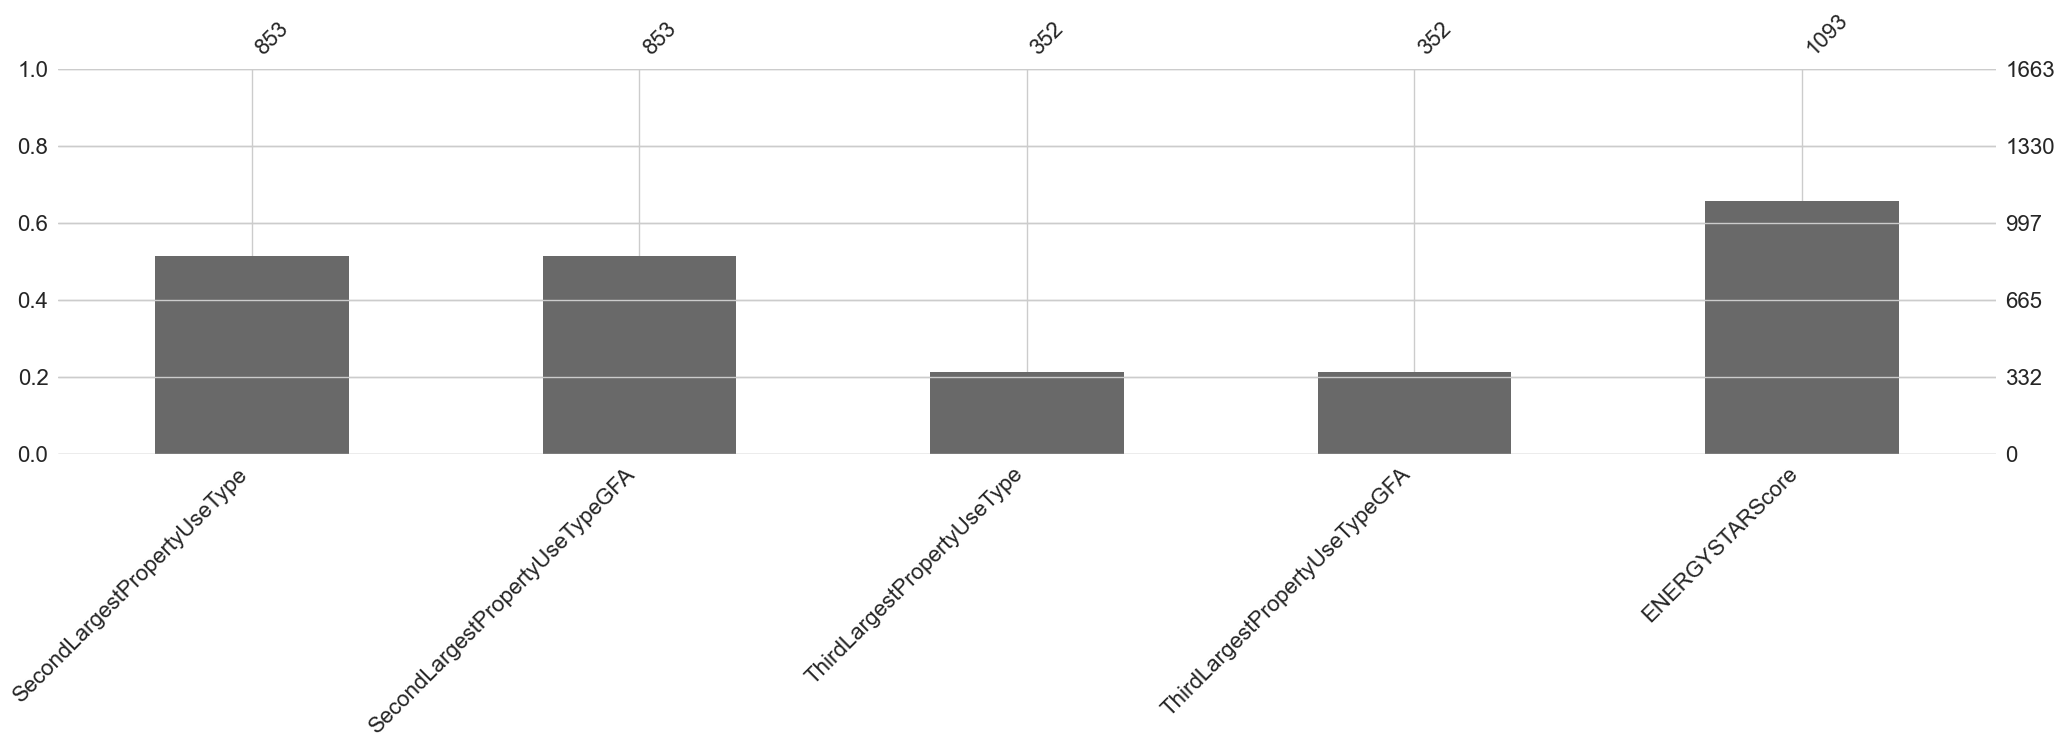

In [35]:
# A new bar chart visualization of the nullity of the given DataFrame.
msno.bar(df[df.columns[df.isna().any()]], figsize = (25, 5))

Comme nous l'avons expliqué précédemment, l'absence de données pour les variables `SecondLargestPropertyUseType ` et `SecondLargestPropertyUseTypeGFA` `SecondLargestPropertyUseTypeGFA  `(ou respectivement `ThirdLargestPropertyUseType` et `ThirdLargestPropertyUseTypeGFA` ) est justifiée par le fait que les biens immobiliers correspondants sont dédiés à une seule utilisation (ou au plus deux).


Enfin, s'agissant de la variable ` ENERGYSTARScore`  (score de performance énergétique globale d'une propriété) qui présente également des valeurs manquantes, nous examinerons après son importance pour la prédiction de la consommation d'énergie.</p>

In [36]:
data=df

## <font color="#337da4" id="">Analyse exploratoire & Feature Engineering</font>

<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> Analyse exploratoire des variables quantitatives</h3>

## Résumé descriptif des variables quantitatives

In [37]:
## Résumé descriptifs des variables quantitatives
var_quanti = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
data[var_quanti[:15]].describe()

OSEBuildingID  DataYear    Latitude    Longitude   YearBuilt  \
count    1663.000000    1663.0  1663.00000  1663.000000  1663.00000   
mean    16328.996392    2016.0    47.61602  -122.332922  1961.97715   
std     13845.888812       0.0     0.04822     0.024609    32.72543   
min         1.000000    2016.0    47.49917  -122.411820  1900.00000   
25%       581.500000    2016.0    47.58535  -122.343300  1930.00000   
50%     21142.000000    2016.0    47.61234  -122.332940  1965.00000   
75%     24601.500000    2016.0    47.64970  -122.321725  1989.00000   
max     50226.000000    2016.0    47.73387  -122.258640  2015.00000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        1663.000000     1663.000000      1.663000e+03   
mean            1.168972        4.123873      1.190469e+05   
std             2.934044        6.572949      2.977825e+05   
min             0.000000        0.000000      1.128500e+04   
25%             1.000000        1.000000      2.945750e+04   
50%             1.000000        2.000000      4.929900e+04   
75%             1.000000        4.000000      1.060205e+05   
max           111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         1663.000000            1.663000e+03               1.663000e+03   
mean         12915.054720            1.061319e+05               9.877456e+04   
std          42329.497628            2.846169e+05               2.766247e+05   
min              0.000000            3.636000e+03               5.656000e+03   
25%              0.000000            2.845850e+04               2.555950e+04   
50%              0.000000            4.741500e+04               4.392000e+04   
75%              0.000000            9.492400e+04               9.200300e+04   
max         512608.000000            9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       853.000000                      352.000000   
mean                      36865.653337                    14955.114769   
std                       69915.617528                    36838.015336   
min                           0.000000                        0.000000   
25%                        5300.000000                     2656.000000   
50%                       12023.000000                     5965.500000   
75%                       31917.000000                    12965.500000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  
count      1093.000000       1663.000000  
mean         65.480329         72.179134  
std          28.487977         74.083664  
min           1.000000          0.000000  
25%          48.000000         33.700001  
50%          73.000000         51.900002  
75%          89.000000         81.599998  
max         100.000000        834.400024

## Aperçu des boîtes à moustache

In [38]:
# Nombre de box-plots par ligne
box_plots_per_row = 5

# Nombre total de lignes nécessaires
total_rows = (len(var_quanti) - 1) // box_plots_per_row + 1

# Création des sous-tracés
fig = make_subplots(rows=total_rows, cols=box_plots_per_row, subplot_titles=var_quanti)

# Affichage des box-plots sur les sous-tracés
for i, var in enumerate(var_quanti):
    row = i // box_plots_per_row + 1
    col = i % box_plots_per_row + 1

    box_fig = px.box(df, y=var, title=var)
    box_fig.update_yaxes(title_text=var)

    # Personnalisation des dimensions de la figure
    box_fig.update_layout(
        width=250,  # Largeur de la figure
        height=300,  # Hauteur de la figure
        margin=dict(l=50, r=50, b=50, t=50),  # Marges de la figure
    )

    # Ajout du box-plot au sous-tracé correspondant
    for trace in box_fig.data :
        fig.add_trace(trace, row=row, col=col)

# Mise à jour du layout de la figure principale
fig.update_layout(showlegend=False, height=total_rows * 300, width=box_plots_per_row * 250)

# Affichage de la figure principale
fig.show()

La plupart des variables contiennent des valeurs extremes

### <font color="#2cb7b0" id="">Les corrélations linéaires</font>

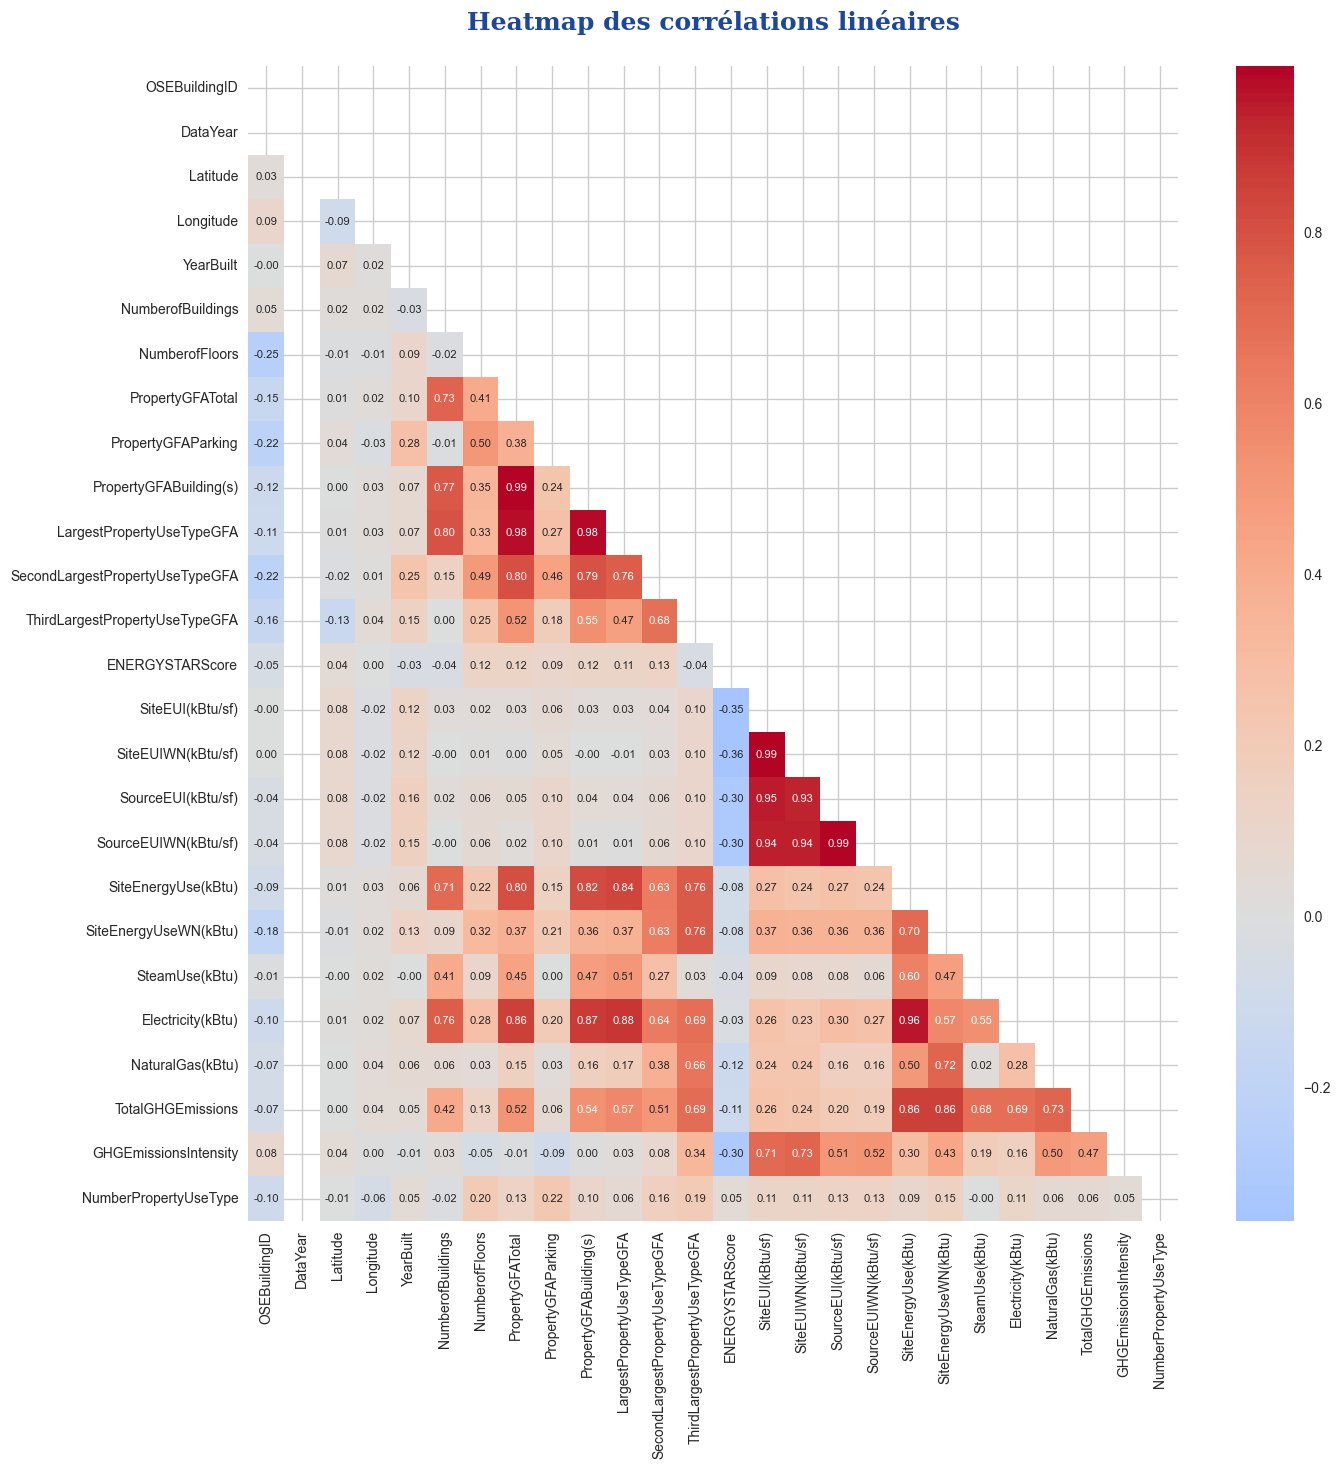

In [39]:
data_numeric = data.select_dtypes(include=[np.number])
corr = data_numeric.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
          fontdict=font_title)
plt.show()

Les émissions de gaz à effet de serre présentent généralement une corrélation linéaire significative avec notre variable cible (`SiteEnergyUse(kBtu`)). Toutefois, il est important de noter que ces émissions sont estimées en fonction de la quantité d'énergie consommée. Par conséquent, la création d'un modèle de prédiction pour la quantité d'énergie consommée par un bâtiment ne devrait pas dépendre de la quantité d'émissions de gaz à effet de serre, car ces données ne sont estimées qu'après avoir déterminé la quantité d'énergie consommée par les bâtiments.
Par contre, les variables `OSEBuildingID`, `DataYear`, `Latitude` et  `Longitude` présentent une très faibles corrélations avec les autres variables. Ce qui n'est sans doûte pas surprenant car ces variables sont censés nous permettre d'identifier les différentes observations et non les expliquer.

Il semble clairement exister une corrélation parfaite entre la quantité d'électricité consommée et notre variable cible à prédire (`SiteEnergyUse(kBtu`). Ceci est vraisemblablement dû au fait que la variable cible semble être une somme parfaite de la quantité d'énergie consommée en électricité, en gaz naturel et en vapeur urbaine, comme le démontre la figure ci-dessous.

Ces trois variables ne seront donc pas prises encore dans la formation du modèle prédictif. Cependant pour eviter la fuite des données (data leakage) nous allons calculer les ratio SteamUse, Electricity, NaturalGas

La variable `PropertyGFATotal` présente une forte corrélation avec les variables `LargestPropertyUseTypeGFA` et `SecondLargestPropertyUseTypeGFA`. Ce que l'on pouvait s'y atttendre car cette première est déduite des autres. Dans la formation de notre modèle nous prendrons pas en compte la variable ` PropertyGFATotal`.

Etant donné que les variables `SiteEUI(kBtu/sf)`, `SiteEUIWN(kBtu/sf)`, `SourceEUI(kBtu/sf)` et `SourceEUIWN(kBtu/sf)` sont calculées à partir de notre variable à prédire, elles ne seront donc pas prise en compte dans la formation de notre modèle.

### *Analyse de la variable SiteEnergyUse(kBtu)*

C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log



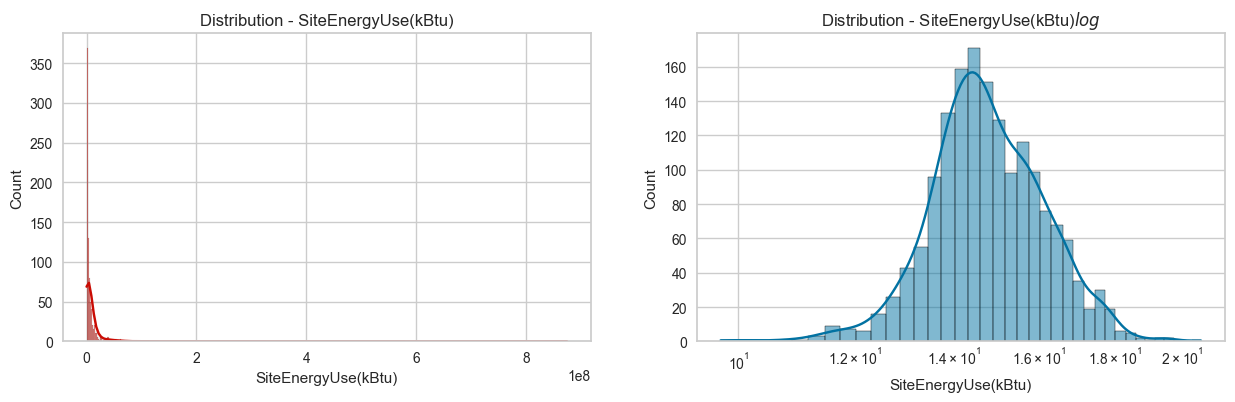

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.histplot(data["SiteEnergyUse(kBtu)"], color='r', kde=True, ax=axes[0])
axes[0].set_title('Distribution - SiteEnergyUse(kBtu)')

sns.histplot(np.log(data["SiteEnergyUse(kBtu)"]), color='b', kde=True, ax=axes[1])
axes[1].set_title('Distribution - SiteEnergyUse(kBtu)$log$')
axes[1].set_xscale('log'); 

Nous remarquons que la représentation en log est beaucoup plus intéressante, en ce sens que sa distrubution ressemble beaucoup plus à celle de la loi normale. Cependant, même le log de la variable n'est pas symétriquement distribué

In [41]:
# statistiques descriptives
statistiques_ener = data['SiteEnergyUse(kBtu)'].describe()

# Calcul du coefficient de variation
#Il s'obtient en divisant l'écart-type de la variable par sa moyenne. C'est un indicateur de dipersion. On le 
# compare souvent à 0.3. S'il est supérieur à ce dernier, on dira que la variable est dispersée. Inversément
# on aboutit à la conclusion opposée.
cv_ener = data['SiteEnergyUse(kBtu)'].std() / data['SiteEnergyUse(kBtu)'].mean()  # Coefficient de variation

# Afficher un joli tableau avec les statistiques
print("Statistiques descriptives de la variable 'SiteEnergyUse(kBtu)':")
print(statistiques_ener)
print(f"Coefficient de variation : {cv_ener}")

Statistiques descriptives de la variable 'SiteEnergyUse(kBtu)':
count    1.663000e+03
mean     8.449617e+06
std      3.026977e+07
min      0.000000e+00
25%      1.230468e+06
50%      2.556131e+06
75%      6.917379e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64
Coefficient de variation : 3.5823833423074487


Faire la distribution du log(varcible)

#### **Interprétations**

La moyenne est de 7.373224e+06(kBtu), le minimum est de 0 et le max de 2.930908e+08. Il est à noter que 25% des bâtiments non résidentiels les moins énergivores de notre jeu de données consomment  1.215744e+06 d'énergie. Aussi, le quart des bâtiments le plus énergivores consomment 6.785911e+06. Il faut noter la consommation d'énergie est très dispersée.

On remarque que la consommation minimale est nulle. Nous allons traiter ce cas

In [42]:
data.loc[data['SiteEnergyUse(kBtu)'] == 0.0, ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']]

Electricity(kBtu)  NaturalGas(kBtu)  SteamUse(kBtu)
28                  0.0               0.0             0.0
31            1496816.0               0.0             0.0
62             600813.0               0.0             0.0
81            1698176.0               0.0             0.0
85            2347138.0               0.0             0.0
95            2104286.0               0.0             0.0
133                 0.0         4318917.0             0.0
139                 0.0         3217877.0             0.0
152                 0.0               0.0             0.0
304                 0.0               0.0             0.0
614           1957268.0               0.0             0.0
630           1433596.0               0.0             0.0
746                 0.0               0.0             0.0
1361                0.0               0.0             0.0
1894                0.0          945537.0             0.0
3166                0.0         4993620.0             0.0

In [43]:
# Mise à jour de 'SiteEnergyUse(kBtu)' pour les lignes qui satisfont la condition
data.loc[data['SiteEnergyUse(kBtu)'] == 0.0, 'SiteEnergyUse(kBtu)'] = data.loc[data['SiteEnergyUse(kBtu)'] == 0.0, ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']].sum(axis=1)

In [44]:
data.loc[data['SiteEnergyUse(kBtu)'] == 0.0, ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']]

Electricity(kBtu)  NaturalGas(kBtu)  SteamUse(kBtu)
28                  0.0               0.0             0.0
152                 0.0               0.0             0.0
304                 0.0               0.0             0.0
746                 0.0               0.0             0.0
1361                0.0               0.0             0.0

In [45]:
print("Nous avons a présent ", data.loc[data['SiteEnergyUse(kBtu)'] == 0.0, ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']].shape[0], "batiments dont SiteEnergyUse est nulle")

Nous avons a présent  5 batiments dont SiteEnergyUse est nulle


Pour ces 5 batiments, on remarque bien que la consommation d'énergie pour chaque source d'énergie est nulle. Ce type d'observation (ne présentant pas de consommation d'énergie) ne nous servirait à rien pour l'objectif de prédiction de la consommation d'énergie des batiments. Il s'agit peut-être de batiments non exploités. On choisit donc de supprimer les observations concernés

In [46]:
data = data[data['SiteEnergyUse(kBtu)']!=0.0]

In [47]:
# Calculer le 3e quartile (Q3) et le 1er quartile (Q1)
Q3 = data['SiteEnergyUse(kBtu)'].quantile(0.75)

# Trouver les lignes avec des valeurs dépassant le 3e quartile
valeurs_excedent_Q3 = data[data['SiteEnergyUse(kBtu)'] > Q3]

# Afficher les lignes dépassant le 3e quartile
# Obtenir un résumé statistique des valeurs dépassant le 3e quartile
print(valeurs_excedent_Q3['SiteEnergyUse(kBtu)'].describe())
print(valeurs_excedent_Q3.info())

count    4.150000e+02
mean     2.703967e+07
std      5.663907e+07
min      6.960904e+06
25%      9.383144e+06
50%      1.446923e+07
75%      2.547470e+07
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 0 to 3356
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    415 non-null    int64  
 1   DataYear                         415 non-null    int64  
 2   BuildingType                     415 non-null    object 
 3   PrimaryPropertyType              415 non-null    object 
 4   PropertyName                     415 non-null    object 
 5   Address                          415 non-null    object 
 6   TaxParcelIdentificationNumber    415 non-null    object 
 7   Neighborhood                     415 non-null    object 
 8   Latitude                         415 non-null    float64

Le nombre de 411 valeurs est loin d'être négligeable, d'autant plus que cela représente environ le quart de notre jeu de données. La bonne nouvelle est qu'il n'y a pas de quantité d'énergie négative

## Observation des autres variables

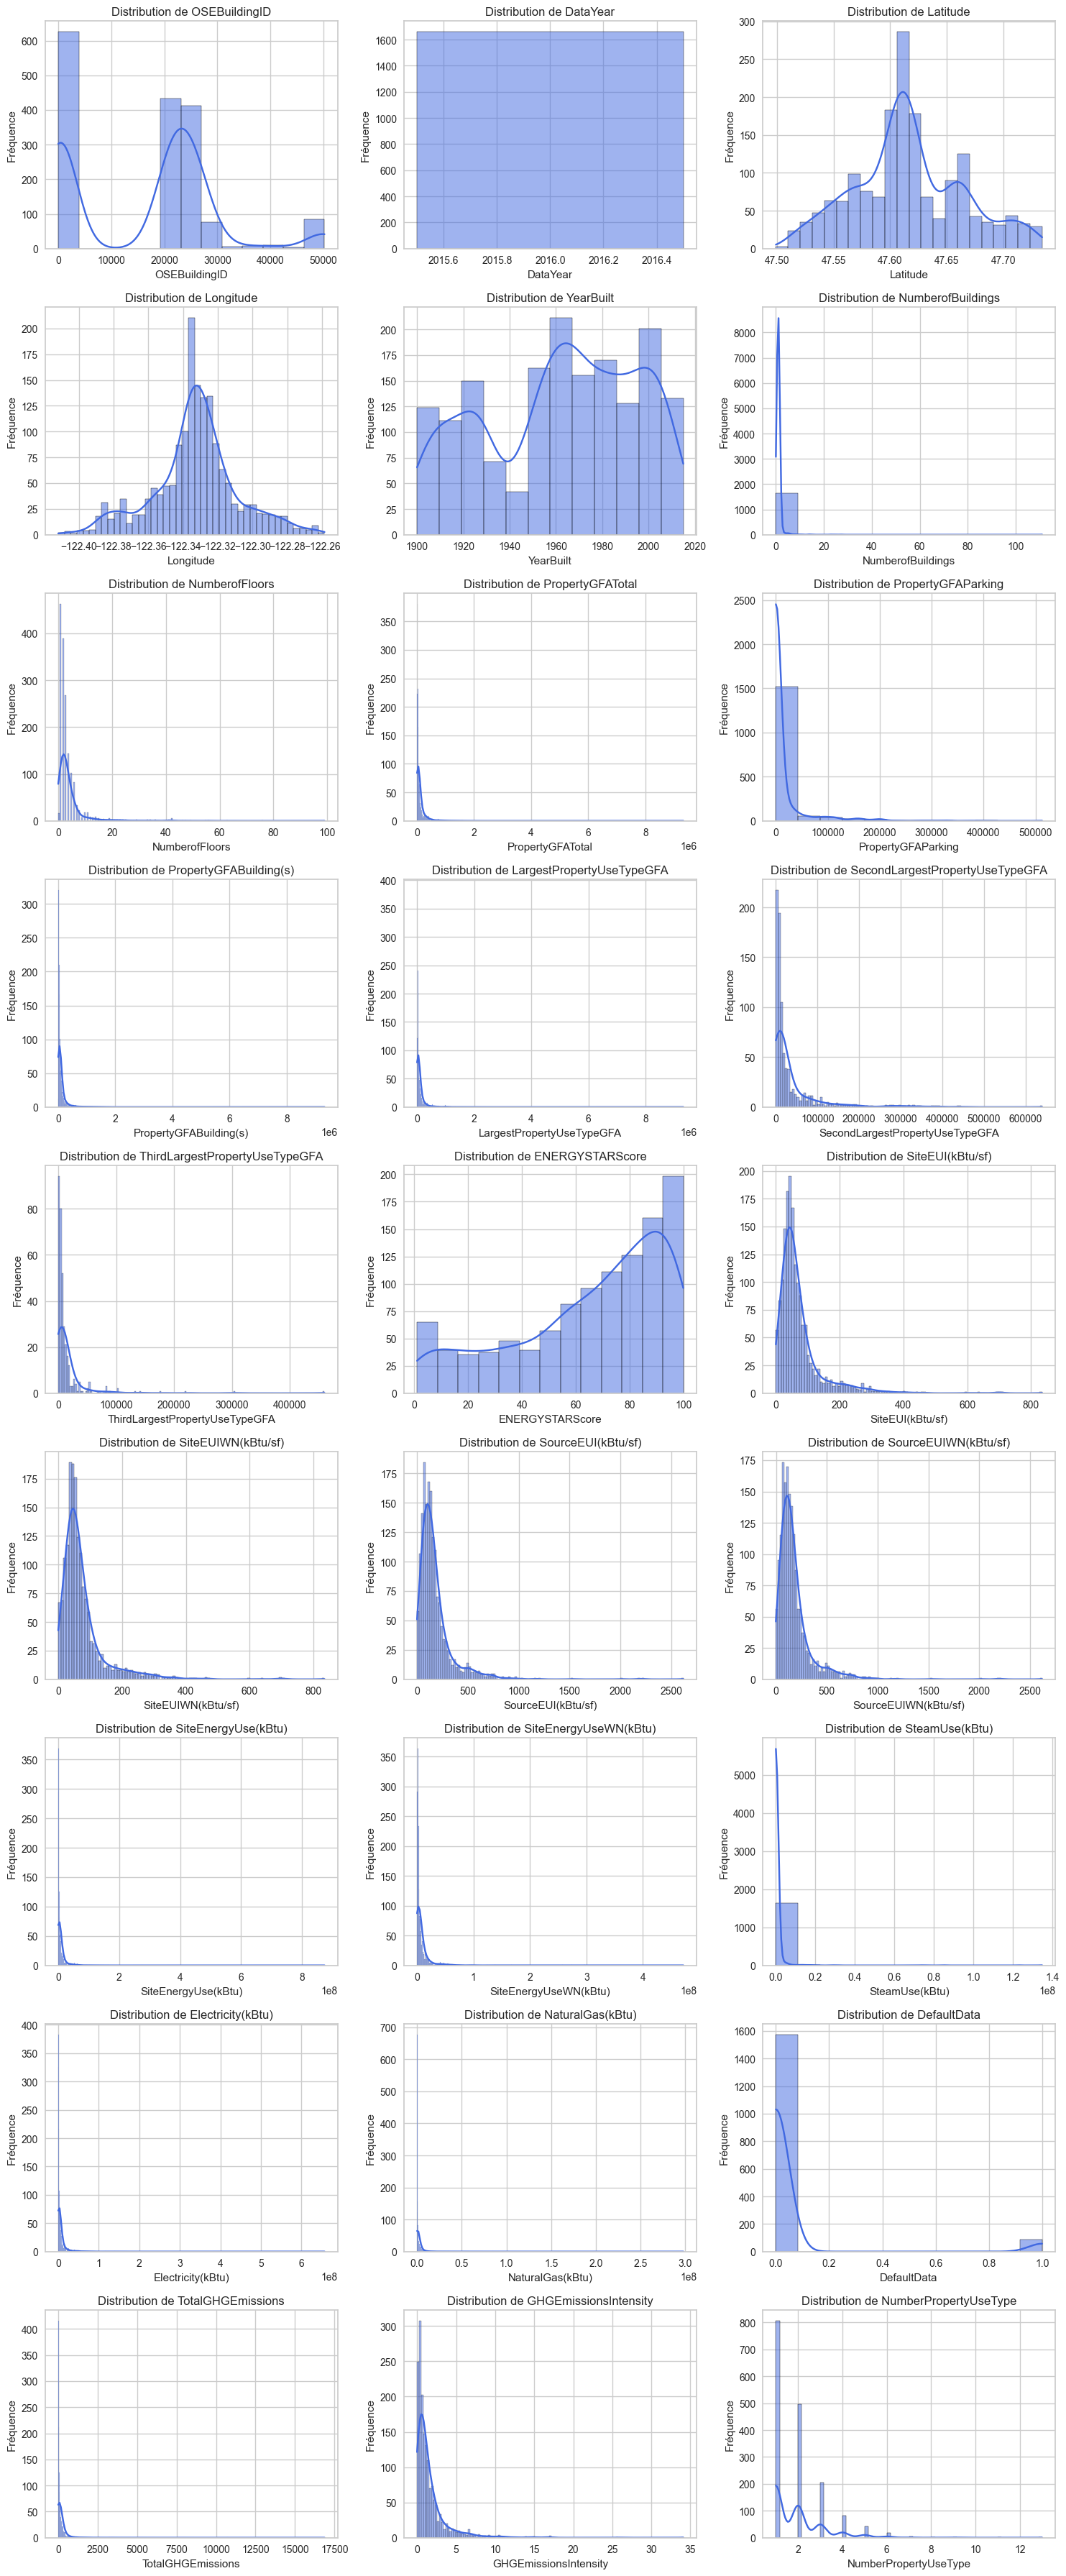

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des sous-graphiques
df_num = data.select_dtypes(exclude=['object'])
num_vars = len(df_num.columns)
cols_per_row = 3  # Nombre de colonnes par ligne
rows = (num_vars // cols_per_row) + (num_vars % cols_per_row > 0)

# Taille de la figure globale
fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 4 * rows))
axes = axes.flatten()  # Aplatir pour un accès facile

# Création des histogrammes et des courbes de densité
for i, col in enumerate(df_num.columns):
    sns.histplot(df_num[col], kde=True, ax=axes[i], color="royalblue")
    axes[i].set_title(f'Distribution de {col}', fontsize=12)
    axes[i].set_ylabel('Fréquence')
    axes[i].set_xlabel(col)

# Supprime les sous-graphiques vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustements finaux
fig.tight_layout()
plt.show()


#### Normalisation des variables puis visualisation des distributions après application du logarithmique

C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p



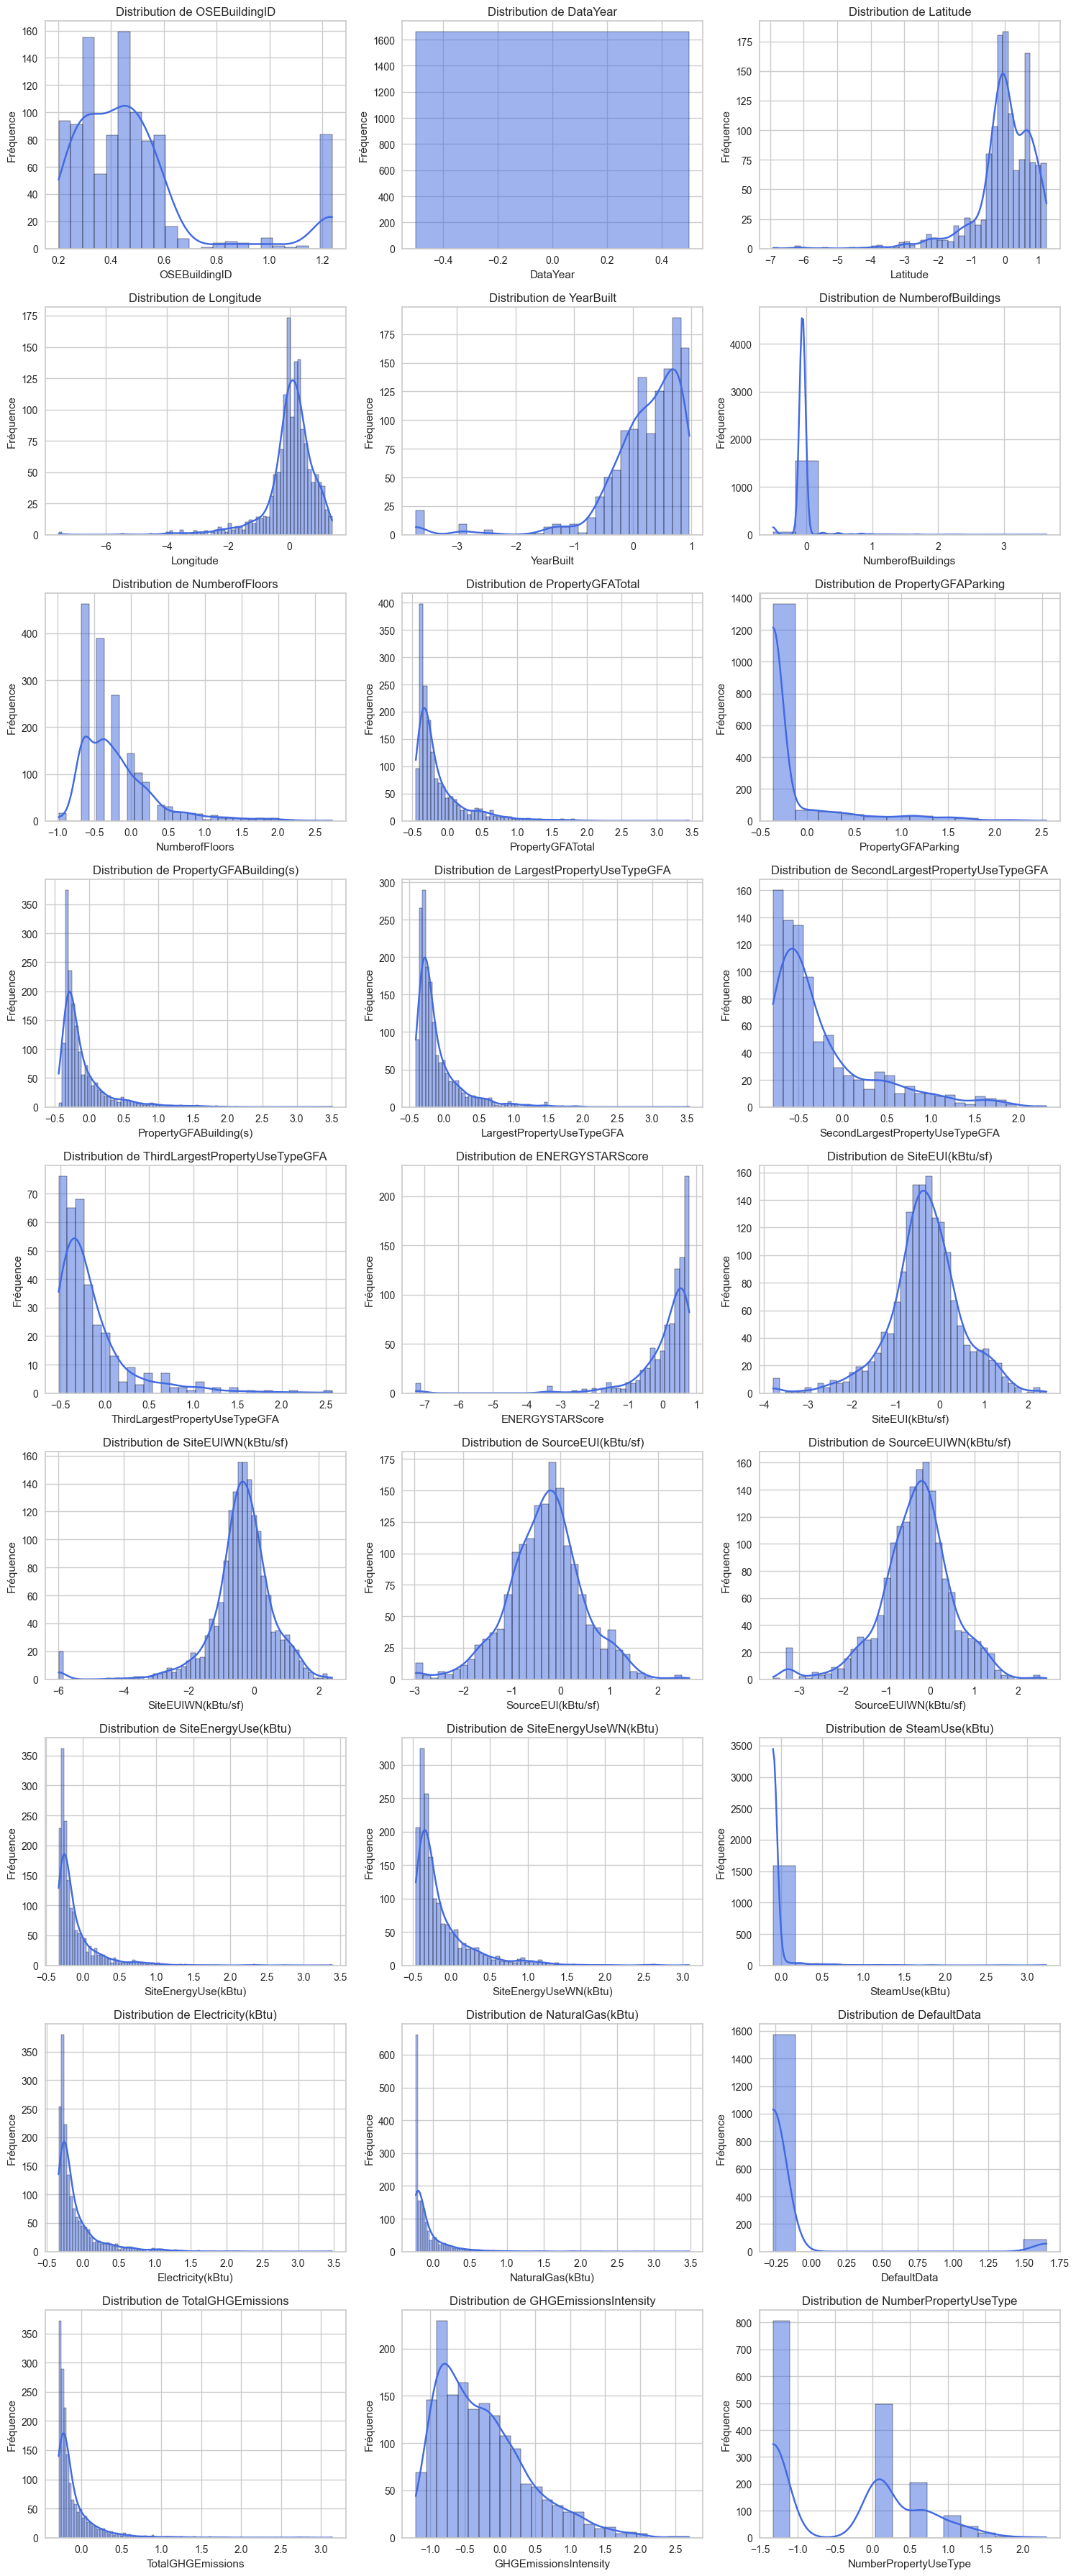

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sélectionner les variables numériques
df_num = data.select_dtypes(exclude=['object'])

# Normalisation des variables
scaler = StandardScaler()
df_num_normalized = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# Application de la transformation logarithmique
df_num_log = df_num_normalized.apply(lambda x: np.log1p(x))  # log1p pour éviter log(0)

# Configuration des sous-graphiques
num_vars = len(df_num_log.columns)
cols_per_row = 3  # Nombre de colonnes par ligne
rows = (num_vars // cols_per_row) + (num_vars % cols_per_row > 0)

# Taille de la figure globale
fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 4 * rows))
axes = axes.flatten()  # Aplatir pour un accès facile

# Création des histogrammes et des courbes de densité
for i, col in enumerate(df_num_log.columns):
    sns.histplot(df_num_log[col], kde=True, ax=axes[i], color="royalblue")
    axes[i].set_title(f'Distribution de {col}', fontsize=12)
    axes[i].set_ylabel('Fréquence')
    axes[i].set_xlabel(col)

# Supprime les sous-graphiques vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustements finaux
fig.tight_layout()
plt.show()


### Traitement des variables longitude et latitude

Regardons à présent si les coordonnées géographiques ont un impact sur les  consommations. Pour cela, afin d'éviter les corrélations fortes entre Latitude et Longitude, nous allons calculer la distance Harversine entre chaque point de coordonnées et le centre de Seattle :

In [50]:
from math import radians, cos, sin, asin, sqrt

#Coordonnées du centre de Seattle
seattle_lat = 47.6062
seattle_lon = -122.3321

def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [51]:
#Calcul des distance au centre de Seattle pour chaque point
data['harvesine_distance'] = [haversine_distance(seattle_lat, seattle_lon, x, y) 
                              for x, y in zip(data.Latitude.astype(float), data.Longitude.astype(float))]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17144\1283156376.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



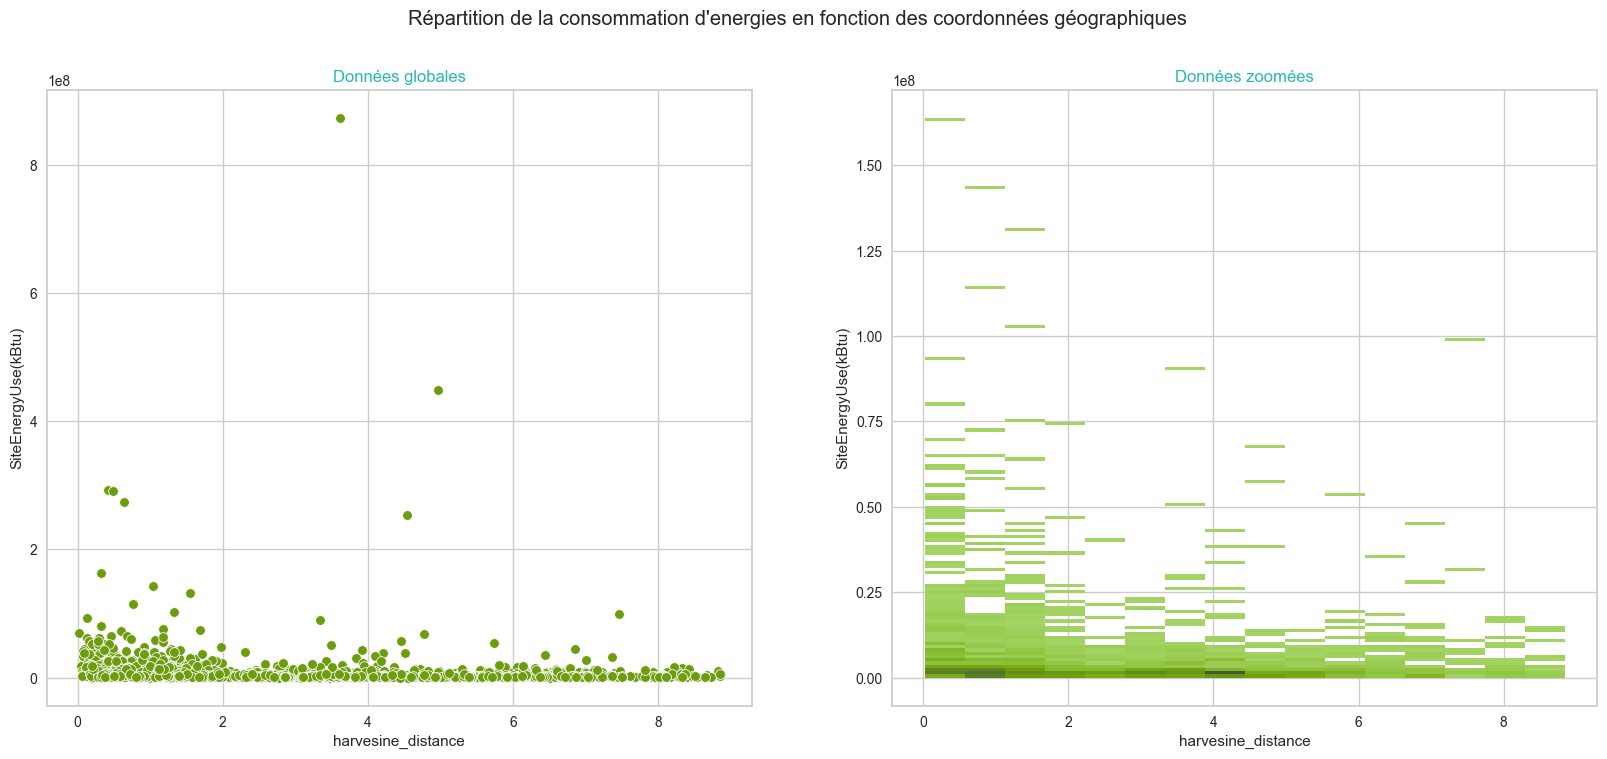

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, y="SiteEnergyUse(kBtu)", x="harvesine_distance", color="#6D9C0E", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.histplot(data=data[(data['SiteEnergyUse(kBtu)'] < 2*10**8)], y="SiteEnergyUse(kBtu)", 
                x="harvesine_distance", color="#6D9C0E", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
font_title = {'fontsize': 22, 'fontweight': 'bold'} 
plt.suptitle("Répartition de la consommation d'energies en fonction des coordonnées géographiques", 
             fontdict=font_title)
plt.show()

En regardant ces projections, il semble que les coordonnées géographiques (donc les adresses des bâtiments) puissent avoir un impact sur les consommations d'énergie.
nous allons supprimer ces 2 colonnes pour conserver uniquement ce point de coordonnée unique Harvesine

<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> Analyse exploratoire des variables qualitatives</h3>

Sortons le nombre de modalités par variables catégorlelles.

In [53]:
obj_columns = list(data.select_dtypes(include=['object', 'bool']).columns)
data[obj_columns].apply(lambda col: col.nunique())

BuildingType                        5
PrimaryPropertyType                21
PropertyName                     1654
Address                          1637
TaxParcelIdentificationNumber    1577
Neighborhood                       19
ListOfAllPropertyUseTypes         368
LargestPropertyUseType             55
SecondLargestPropertyUseType       47
ThirdLargestPropertyUseType        39
DefaultData                         2
ComplianceStatus                    4
dtype: int64

## Recodage des variables catégorielles

In [54]:

data["BuildingType"]=data["BuildingType"].replace(['Nonresidential WA','Nonresidential COS'],"NonResidential")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17144\1072800626.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
data["BuildingType"].unique()

array(['NonResidential', 'SPS-District K-12', 'Campus'], dtype=object)

In [56]:
# Transformons les modalités des variables catégorielles en majuscule pour éviter un double compte
for cat in data[obj_columns]:
    data[cat] = data[cat].apply(lambda x: str(x).upper())
data[obj_columns]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17144\1515311210.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



BuildingType PrimaryPropertyType                         PropertyName  \
0     NONRESIDENTIAL               HOTEL                 MAYFLOWER PARK HOTEL   
1     NONRESIDENTIAL               HOTEL                      PARAMOUNT HOTEL   
2     NONRESIDENTIAL               HOTEL              5673-THE WESTIN SEATTLE   
3     NONRESIDENTIAL               HOTEL                            HOTEL MAX   
4     NONRESIDENTIAL               HOTEL          WARWICK SEATTLE HOTEL (ID8)   
...              ...                 ...                                  ...   
3371  NONRESIDENTIAL              OFFICE                HORTICULTURE BUILDING   
3372  NONRESIDENTIAL               OTHER  INTERNATIONAL DISTRICT/CHINATOWN CC   
3373  NONRESIDENTIAL               OTHER                      QUEEN ANNE POOL   
3374  NONRESIDENTIAL  MIXED USE PROPERTY          SOUTH PARK COMMUNITY CENTER   
3375  NONRESIDENTIAL  MIXED USE PROPERTY          VAN ASSELT COMMUNITY CENTER   

               Address TaxParcelIdentificationNumber           Neighborhood  \
0        405 OLIVE WAY                    0659000030               DOWNTOWN   
1      724 PINE STREET                    0659000220               DOWNTOWN   
2      1900 5TH AVENUE                    0659000475               DOWNTOWN   
3       620 STEWART ST                    0659000640               DOWNTOWN   
4        401 LENORA ST                    0659000970               DOWNTOWN   
...                ...                           ...                    ...   
3371  1600 S DAKOTA ST                    1624049080       GREATER DUWAMISH   
3372     719 8TH AVE S                    3558300000               DOWNTOWN   
3373    1920 1ST AVE W                    1794501150  MAGNOLIA / QUEEN ANNE   
3374    8319 8TH AVE S                    7883603155       GREATER DUWAMISH   
3375  2820 S MYRTLE ST                    7857002030       GREATER DUWAMISH   

                              ListOfAllPropertyUseTypes  \
0                                                 HOTEL   
1                            HOTEL, PARKING, RESTAURANT   
2                                                 HOTEL   
3                                                 HOTEL   
4                         HOTEL, PARKING, SWIMMING POOL   
...                                                 ...   
3371                                             OFFICE   
3372                                 OTHER - RECREATION   
3373  FITNESS CENTER/HEALTH CLUB/GYM, OTHER - RECREA...   
3374  FITNESS CENTER/HEALTH CLUB/GYM, FOOD SERVICE, ...   
3375  FITNESS CENTER/HEALTH CLUB/GYM, FOOD SERVICE, ...   

     LargestPropertyUseType    SecondLargestPropertyUseType  \
0                     HOTEL                             NAN   
1                     HOTEL                         PARKING   
2                     HOTEL                             NAN   
3                     HOTEL                             NAN   
4                     HOTEL                         PARKING   
...                     ...                             ...   
3371                 OFFICE                             NAN   
3372     OTHER - RECREATION                             NAN   
3373     OTHER - RECREATION  FITNESS CENTER/HEALTH CLUB/GYM   
3374     OTHER - RECREATION  FITNESS CENTER/HEALTH CLUB/GYM   
3375     OTHER - RECREATION  FITNESS CENTER/HEALTH CLUB/GYM   

     ThirdLargestPropertyUseType DefaultData              ComplianceStatus  
0                            NAN       FALSE                     COMPLIANT  
1                     RESTAURANT       FALSE                     COMPLIANT  
2                            NAN       FALSE                     COMPLIANT  
3                            NAN       FALSE                     COMPLIANT  
4                  SWIMMING POOL       FALSE                     COMPLIANT  
...                          ...         ...                           ...  
3371                         NAN        TRUE  ERROR - CORRECT DEFAULT DATA  
3372

In [57]:
# Redeterminons le nombre de modalités par variables
data[obj_columns].apply(lambda col: col.nunique())

BuildingType                        3
PrimaryPropertyType                21
PropertyName                     1653
Address                          1636
TaxParcelIdentificationNumber    1577
Neighborhood                       14
ListOfAllPropertyUseTypes         368
LargestPropertyUseType             55
SecondLargestPropertyUseType       48
ThirdLargestPropertyUseType        40
DefaultData                         2
ComplianceStatus                    4
dtype: int64

On remarque que le nombre de modalités de la variable Neighborhood a diminué. Faisons un focus sur ses modalités pour voir si elles ne nécessitent pas un recodage.

In [58]:
data['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

On peut remarquer que DELRIDGE NEIGHBORHOODS et DELRIDGE correspondent à la même modalité. Dans la suite, on remplace tous les DELRIDGE NEIGHBORHOODS par DELRIDGE.

In [59]:
data['Neighborhood'] = data['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE')
data['Neighborhood'].unique()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17144\3429553647.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE'],
      dtype=object)

In [60]:
# Nouvelles classes en anglais et en majuscules
new_classes = {
    'EDUCATION': ['K-12 SCHOOL', 'UNIVERSITY'],
    'HEALTH AND MEDICAL': ['SENIOR CARE COMMUNITY', 'HOSPITAL', 'MEDICAL OFFICE', 'LABORATORY'],
    'OFFICE AND BUSINESS': ['OFFICE', 'LARGE OFFICE', 'SMALL- AND MID-SIZED OFFICE'],
    'STORAGE': ['SELF-STORAGE FACILITY', 'WAREHOUSE', 'REFRIGERATED WAREHOUSE', 'DISTRIBUTION CENTER'],
    'RETAIL AND PERSONAL SERVICES': ['RETAIL STORE'],
    'HOTEL': ['HOTEL'],
    'RESIDENTIAL AND HOUSING': ['LOW-RISE MULTIFAMILY', 'RESIDENCE HALL'],
    'FOOD AND BEVERAGE': ['RESTAURANT', 'SUPERMARKET / GROCERY STORE'],
    'MIXED USE': ['MIXED USE PROPERTY'],
    'OTHER SERVICES AND FACILITIES': ['OTHER', 'WORSHIP FACILITY']
}

# Fonction pour mapper les classes
def map_class(category):
    for key, values in new_classes.items():
        if category in values:
            return key
    return 'UNDEFINED'

# Création de la PrimaryProperty en fonction de la PrimaryPropertyType
data['PrimaryProperty'] = data['PrimaryPropertyType'].apply(map_class)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17144\297082477.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
data['PrimaryProperty'].unique()

array(['HOTEL', 'OTHER SERVICES AND FACILITIES', 'MIXED USE', 'EDUCATION',
       'OFFICE AND BUSINESS', 'STORAGE', 'HEALTH AND MEDICAL',
       'RETAIL AND PERSONAL SERVICES', 'RESIDENTIAL AND HOUSING',
       'FOOD AND BEVERAGE'], dtype=object)

In [62]:
data['SecondLargestPropertyUseType'].unique()

array(['NAN', 'PARKING', 'OFFICE', 'RESTAURANT', 'K-12 SCHOOL',
       'LABORATORY', 'REFRIGERATED WAREHOUSE',
       'NON-REFRIGERATED WAREHOUSE', 'OTHER - EDUCATION',
       'VOCATIONAL SCHOOL', 'RETAIL STORE',
       'PERSONAL SERVICES (HEALTH/BEAUTY, DRY CLEANING, ETC)',
       'OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY', 'DATA CENTER',
       'SWIMMING POOL', 'OTHER', 'COURTHOUSE', 'RESIDENCE HALL/DORMITORY',
       'DISTRIBUTION CENTER', 'SELF-STORAGE FACILITY', 'OTHER - SERVICES',
       'MOVIE THEATER', 'SUPERMARKET/GROCERY STORE', 'MEDICAL OFFICE',
       'OTHER - RECREATION', 'CONVENIENCE STORE WITHOUT GAS STATION',
       'PERFORMING ARTS', 'COLLEGE/UNIVERSITY', 'OTHER - RESTAURANT/BAR',
       'ADULT EDUCATION', 'ENCLOSED MALL', 'MULTIFAMILY HOUSING',
       'BAR/NIGHTCLUB', 'FINANCIAL OFFICE',
       'REPAIR SERVICES (VEHICLE, SHOE, LOCKSMITH, ETC)',
       'MANUFACTURING/INDUSTRIAL PLANT', 'OTHER - LODGING/RESIDENTIAL',
       'BANK BRANCH', 'FITNESS CENTER/HEALTH CLUB/GYM', 

In [63]:
new_classes = {
    'EDUCATION': ['K-12 SCHOOL', 'VOCATIONAL SCHOOL', 'COLLEGE/UNIVERSITY', 'ADULT EDUCATION', 'OTHER - EDUCATION', 'PRE-SCHOOL/DAYCARE'],
    'RETAIL AND PERSONAL SERVICES': ['RETAIL STORE', 'PERSONAL SERVICES (HEALTH/BEAUTY, DRY CLEANING, ETC)', 'CONVENIENCE STORE WITHOUT GAS STATION'],
    'ENTERTAINMENT AND LEISURE': ['OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY', 'MOVIE THEATER', 'SWIMMING POOL', 'PERFORMING ARTS', 'BAR/NIGHTCLUB', 'SOCIAL/MEETING HALL'],
    'FOOD AND BEVERAGE': ['RESTAURANT', 'SUPERMARKET/GROCERY STORE', 'FOOD SALES', 'FOOD SERVICE', 'OTHER - RESTAURANT/BAR'],
    'HEALTH AND MEDICAL': ['MEDICAL OFFICE', 'LABORATORY', 'FITNESS CENTER/HEALTH CLUB/GYM'],
    'OFFICE AND BUSINESS': ['OFFICE', 'DATA CENTER', 'MANUFACTURING/INDUSTRIAL PLANT', 'BANK BRANCH', 'REPAIR SERVICES (VEHICLE, SHOE, LOCKSMITH, ETC)'],
    'RESIDENTIAL AND HOUSING': ['RESIDENCE HALL/DORMITORY', 'MULTIFAMILY HOUSING', 'OTHER - LODGING/RESIDENTIAL'],
    'STORAGE': ['SELF-STORAGE FACILITY', 'REFRIGERATED WAREHOUSE', 'NON-REFRIGERATED WAREHOUSE', 'DISTRIBUTION CENTER'],
    'OTHER SERVICES AND FACILITIES': ['OTHER', 'OTHER - SERVICES', 'OTHER - RECREATION', 'OTHER - PUBLIC SERVICES', 'ENCLOSED MALL', 'AUTOMOBILE DEALERSHIP', 'WORSHIP FACILITY'],
    'NOT CONCERNED': ['NOT CONCERNED'],
    'HOTEL': ['HOTEL'],
    'PARKING': ['PARKING']
}

# Fonction pour mapper les classes
def map_class(category):
    for key, values in new_classes.items():
        if category in values:
            return key
    return 'UNDEFINED'

# Création de la SecondLargest en fonction de la SecondLargestPropertyUseType
data['SecondLargest'] = data['SecondLargestPropertyUseType'].apply(map_class)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17144\814041802.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
data['SecondLargest'].unique()

array(['UNDEFINED', 'PARKING', 'OFFICE AND BUSINESS', 'FOOD AND BEVERAGE',
       'EDUCATION', 'HEALTH AND MEDICAL', 'STORAGE',
       'RETAIL AND PERSONAL SERVICES', 'ENTERTAINMENT AND LEISURE',
       'OTHER SERVICES AND FACILITIES', 'RESIDENTIAL AND HOUSING',
       'HOTEL'], dtype=object)

In [65]:
data['ThirdLargestPropertyUseType'].unique()

array(['NAN', 'RESTAURANT', 'SWIMMING POOL', 'DATA CENTER', 'OFFICE',
       'RETAIL STORE', 'OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY',
       'NON-REFRIGERATED WAREHOUSE', 'OTHER', 'DISTRIBUTION CENTER',
       'FOOD SERVICE', 'OTHER - SERVICES', 'MEDICAL OFFICE', 'PARKING',
       'OTHER - UTILITY', 'K-12 SCHOOL', 'FITNESS CENTER/HEALTH CLUB/GYM',
       'SOCIAL/MEETING HALL', 'PRE-SCHOOL/DAYCARE',
       'CONVENIENCE STORE WITHOUT GAS STATION', 'FINANCIAL OFFICE',
       'OTHER - RESTAURANT/BAR', 'OTHER - EDUCATION',
       'MULTIFAMILY HOUSING', 'LABORATORY', 'BANK BRANCH', 'HOTEL',
       'PERSONAL SERVICES (HEALTH/BEAUTY, DRY CLEANING, ETC)',
       'OTHER - RECREATION', 'SELF-STORAGE FACILITY',
       'OTHER - TECHNOLOGY/SCIENCE', 'REFRIGERATED WAREHOUSE',
       'BAR/NIGHTCLUB', 'MANUFACTURING/INDUSTRIAL PLANT',
       'OTHER/SPECIALTY HOSPITAL', 'FAST FOOD RESTAURANT',
       'WORSHIP FACILITY', 'SUPERMARKET/GROCERY STORE', 'STRIP MALL',
       'VOCATIONAL SCHOOL'], dtype=object

In [66]:
# Nouvelles classes en anglais et en majuscules
new_classes = {
    'EDUCATION': ['K-12 SCHOOL', 'VOCATIONAL SCHOOL', 'COLLEGE/UNIVERSITY', 'ADULT EDUCATION', 'OTHER - EDUCATION', 'PRE-SCHOOL/DAYCARE'],
    'RETAIL AND PERSONAL SERVICES': ['RETAIL STORE', 'PERSONAL SERVICES (HEALTH/BEAUTY, DRY CLEANING, ETC)', 'CONVENIENCE STORE WITHOUT GAS STATION'],
    'ENTERTAINMENT AND LEISURE': ['SWIMMING POOL', 'OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY', 'SOCIAL/MEETING HALL', 'BAR/NIGHTCLUB'],
    'FOOD AND BEVERAGE': ['RESTAURANT', 'FAST FOOD RESTAURANT', 'FOOD SERVICE', 'SUPERMARKET/GROCERY STORE'],
    'HEALTH AND MEDICAL': ['MEDICAL OFFICE', 'OTHER/SPECIALTY HOSPITAL', 'LABORATORY', 'FITNESS CENTER/HEALTH CLUB/GYM'],
    'OFFICE AND BUSINESS': ['OFFICE', 'DATA CENTER', 'FINANCIAL OFFICE', 'BANK BRANCH', 'MANUFACTURING/INDUSTRIAL PLANT'],
    'RESIDENTIAL AND HOUSING': ['MULTIFAMILY HOUSING'],
    'STORAGE': ['REFRIGERATED WAREHOUSE', 'NON-REFRIGERATED WAREHOUSE', 'DISTRIBUTION CENTER', 'SELF-STORAGE FACILITY'],
    'OTHER SERVICES AND FACILITIES': ['OTHER - SERVICES', 'OTHER - UTILITY', 'WORSHIP FACILITY', 'OTHER - RECREATION', 'OTHER - TECHNOLOGY/SCIENCE', 'OTHER', 'OTHER - RESTAURANT/BAR'],
    'HOTEL': ['HOTEL'],
    'PARKING': ['PARKING'],
    'NOT CONCERNED': ['NOT CONCERNED']
}

# Fonction pour mapper les classes
def map_class(category):
    for key, values in new_classes.items():
        if category in values:
            return key
    return 'UNDEFINED'

# Création de la ThirdLargest en fonction de la ThirdLargestPropertyUseType
data['ThirdLargest'] = data['ThirdLargestPropertyUseType'].apply(map_class)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17144\3219096351.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
data['ThirdLargest'].unique()

array(['UNDEFINED', 'FOOD AND BEVERAGE', 'ENTERTAINMENT AND LEISURE',
       'OFFICE AND BUSINESS', 'RETAIL AND PERSONAL SERVICES', 'STORAGE',
       'OTHER SERVICES AND FACILITIES', 'HEALTH AND MEDICAL', 'PARKING',
       'EDUCATION', 'RESIDENTIAL AND HOUSING', 'HOTEL'], dtype=object)

Correlation entre les variables qualitatives

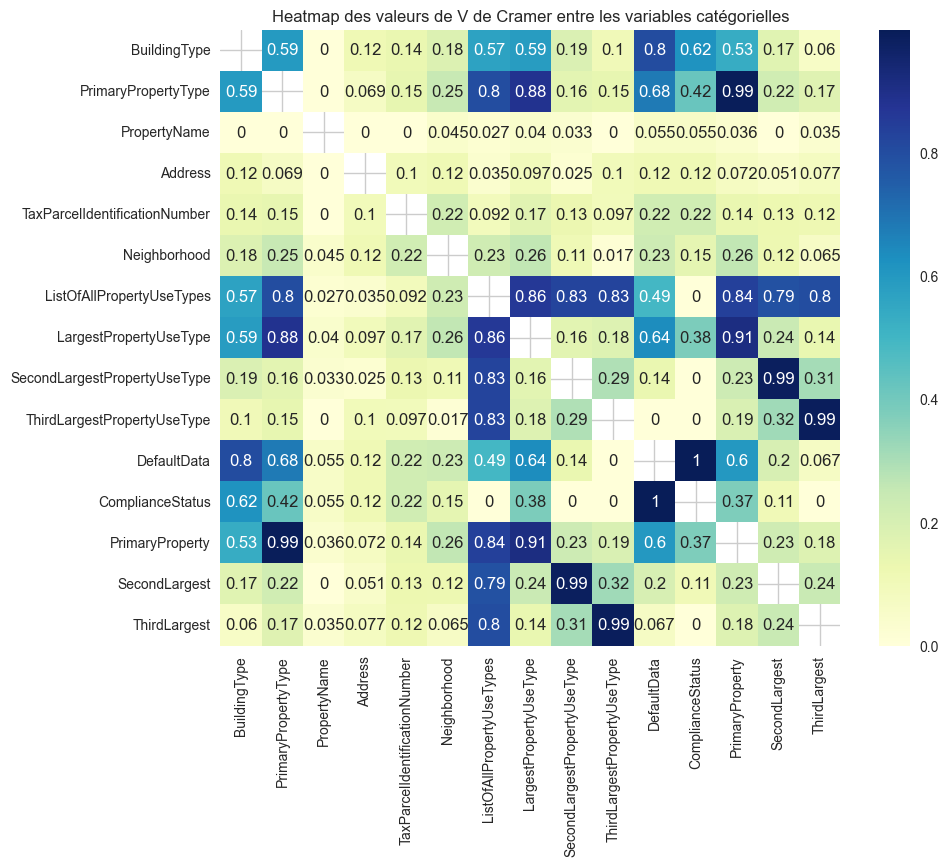

In [68]:
# Sélectionnez uniquement les colonnes catégorielles
data_cat = data.select_dtypes(include=['object', 'category'])

# Créez une fonction pour calculer le V de Cramer
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)  * 2) / (n - 1)
    kcorr = k - ((k - 1) * 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Créez un DataFrame pour stocker les résultats du V de Cramer
cramers_v_results = pd.DataFrame(index=data_cat.columns, columns=data_cat.columns)

# Calculer le V de Cramer pour chaque paire de variables catégorielles
for col1 in data_cat.columns:
    for col2 in data_cat.columns:
        if col1 != col2:
            v_cramer = cramers_v(data_cat[col1], data_cat[col2])
            cramers_v_results.loc[col1, col2] = v_cramer

# Convertir les valeurs de V de Cramer en nombres flottants
cramers_v_results = cramers_v_results.astype(float)

# Créer un heatmap des valeurs de V de Cramer
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_results, annot=True, cmap="YlGnBu")
plt.title("Heatmap des valeurs de V de Cramer entre les variables catégorielles")
plt.show()

<h2 style="margin: auto; padding: 20px; font-size: 40px;color: RGB(51,165,182); "> Feature Engineering</h2>

### Transformation de la variable yearBuilt en nombre d'années

Representation de la distribution de la variable

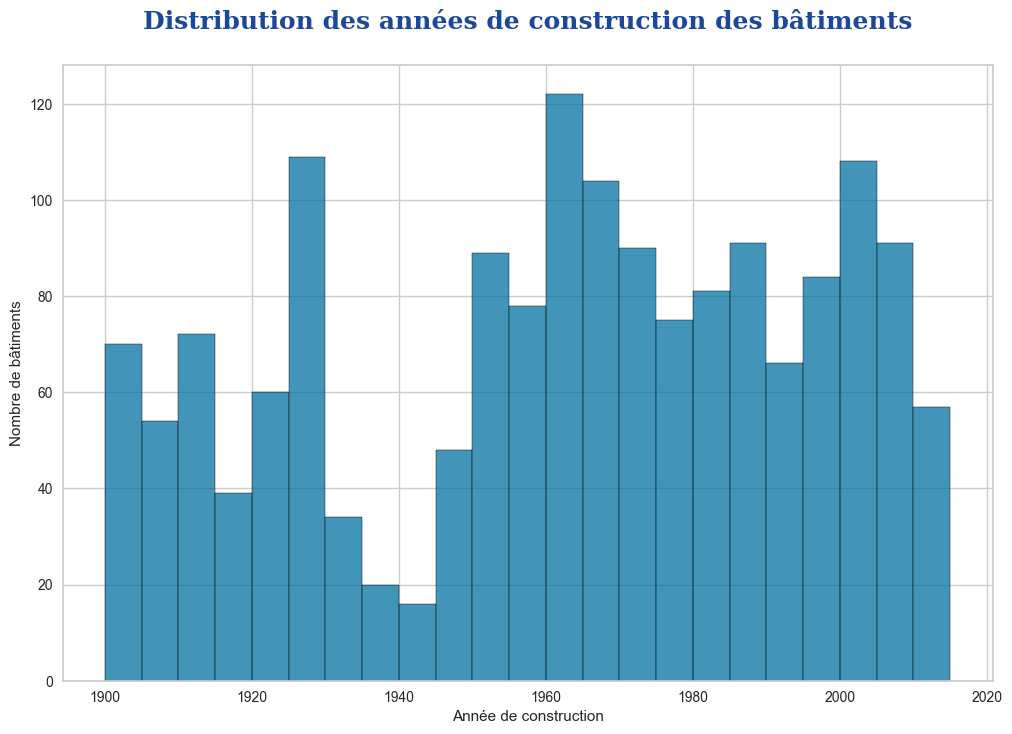

In [69]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='YearBuilt', bins=int((data.YearBuilt.max() - data.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n", fontdict=font_title)
plt.show()

Il serait intéressant de traiter l'**age des bâtiments** pour réduire la dispersion des données et lier l'année des relevés(consommation d'electricité, de gaz et autres). Nous allons donc créer cette nouvelle variable et supprimer l'année de construction :

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17144\1940026375.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17144\1940026375.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



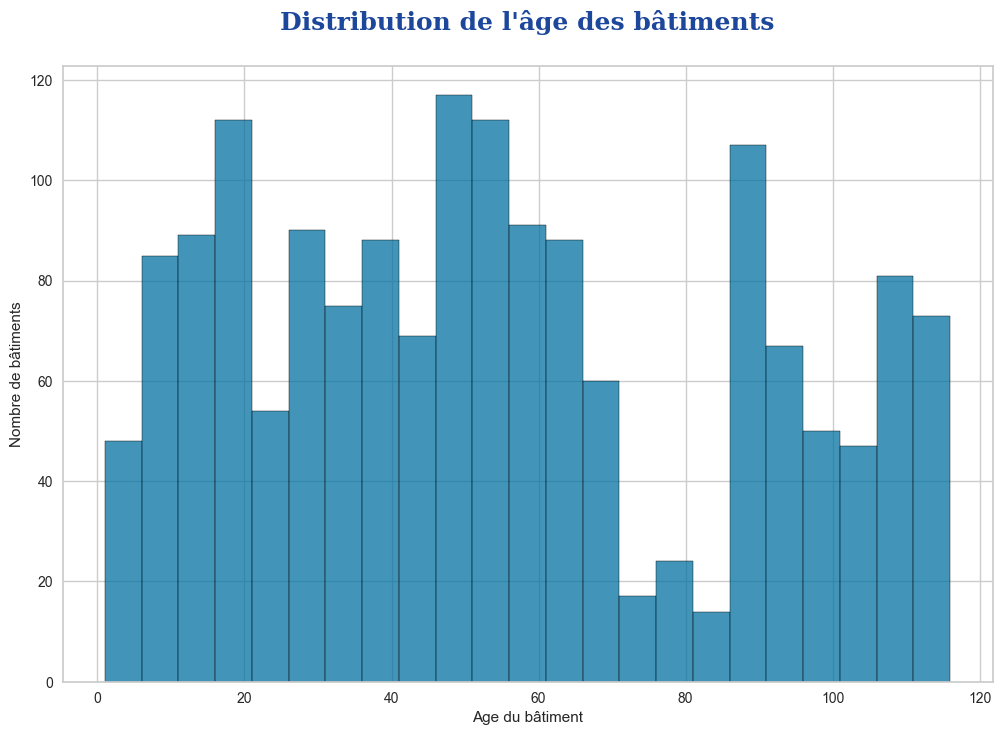

In [70]:
data['BuildingAge'] = 2016 - data['YearBuilt']
data.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='BuildingAge', bins=int((data.BuildingAge.max() - data.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n", fontdict=font_title)
plt.show()

<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> Selection des variables </h3>

In [71]:
print(data.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'TaxParcelIdentificationNumber',
       'Neighborhood', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'NumberPropertyUseType',
       'harvesine_distance', 'PrimaryProperty', 'SecondLargest',
       'ThirdLargest', 'Building

In [72]:
var_model = ['OSEBuildingID', 'BuildingType', 'Neighborhood', 'BuildingAge', 'NumberofBuildings', 
        'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'PrimaryProperty', 'LargestPropertyUseTypeGFA',
       'SecondLargest', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargest', 'ThirdLargestPropertyUseTypeGFA','NumberPropertyUseType', 'harvesine_distance', 'BuildingAge',
        'ENERGYSTARScore','SiteEnergyUse(kBtu)'
       ]

In [73]:
data_final = data.filter(var_model)

In [75]:
data_final.to_csv(Path(DATA_DIR, "data_clean.csv"), index=False)

## <font color="#337da4" id="section_4">Projection des établissements sur la carte de Seattle</font>

In [ ]:
##pip install folium

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/109.8 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.8 kB ? eta -:--:--
   -------------- ------------------------ 41.0/109.8 kB 495.5 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/109.8 kB 845.5 kB/s eta 0:00:01
   -------------------------------------- 109.8/109.8 kB 796.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
   ---------------------------------------- 85.1/85.1 kB 4.7 MB/s eta 0:00:00


In [76]:
import folium
import folium.plugins

seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(data.Latitude, data.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map